In [355]:
#libraries 

import seaborn as sns 
import matplotlib.pyplot as plt

import pandas as pd 
import numpy as np 


from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error,r2_score

In [356]:
df = pd.read_csv("2.csv")

In [357]:
df.head()

,LOWER COND TEMP AT INELT',LOWER COND TEMP AT OUTLET,UPPER COND TEMPE AT INELT,UPPER COND TEMPE AT OUTLET,BENZOL WASHER INLET GAS TEMP,BENZOL WASHER OUTLET GAS TEMP,BENZOL WASHER INLET OIL TEMP,BENZOL WASHER RESISTANCE,RICH OIL FLOW(M3/hr),RICH OIL INLET TEMP TO PIPEHEATER,...,Dry basis,wet basis,Actual,Dry basis.1,Consumer(from FMD),Flare(Flow meter),Tot Gas to Battry,SAP production,0,SAP production.1
0,33.99,30.02,27.36,22.18,27.58,35.97,27.58,3.12,65.39,152.66,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
1,34.29,31.00,27.66,22.75,27.39,36.58,27.39,3.35,65.58,152.94,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
2,34.11,31.92,26.67,22.81,27.59,37.54,27.59,2.36,65.43,152.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
3,33.75,31.16,28.50,23.54,28.11,36.70,28.11,2.54,65.46,151.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
4,33.12,30.58,28.87,23.25,28.60,36.13,28.60,2.63,65.09,151.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0


In [358]:
df.tail()

,LOWER COND TEMP AT INELT',LOWER COND TEMP AT OUTLET,UPPER COND TEMPE AT INELT,UPPER COND TEMPE AT OUTLET,BENZOL WASHER INLET GAS TEMP,BENZOL WASHER OUTLET GAS TEMP,BENZOL WASHER INLET OIL TEMP,BENZOL WASHER RESISTANCE,RICH OIL FLOW(M3/hr),RICH OIL INLET TEMP TO PIPEHEATER,...,Dry basis,wet basis,Actual,Dry basis.1,Consumer(from FMD),Flare(Flow meter),Tot Gas to Battry,SAP production,0,SAP production.1
992,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.00,0.0,0.000000,0.0,0.0,0,0.0,0.000000,0.0
993,34.38,31.44,27.50,23.20,29.70,35.20,29.70,3.75,65.45,151.61,...,0.000,0.00,0.0,0.000000,0.0,0.0,0,0.0,0.000000,0.0
994,34.54,31.72,27.14,23.26,29.71,35.66,29.71,3.77,65.37,152.27,...,3049.057,3338.90,991416.0,325.154958,91192.0,6378.0,432853,80.0,2.623762,22.0
995,34.30,31.89,26.92,23.43,29.62,35.63,29.62,3.83,65.24,151.43,...,3141.480,3429.92,1040472.0,331.204401,108661.0,4379.0,358026,80.0,2.546570,24.0
996,33.88,31.17,28.06,23.65,28.53,34.54,28.53,3.09,57.74,142.08,...,3134.142,3423.77,1052496.0,335.816309,99275.0,14175.0,132904,80.0,2.552533,24.0


In [359]:
df.isnull().sum()

LOWER COND TEMP AT INELT'                 0
LOWER COND TEMP AT OUTLET                 0
UPPER COND TEMPE AT INELT                 0
UPPER COND TEMPE AT OUTLET                0
BENZOL WASHER INLET GAS TEMP              0
BENZOL WASHER  OUTLET GAS TEMP            0
BENZOL WASHER  INLET OIL TEMP             0
BENZOL WASHER RESISTANCE                  0
RICH OIL FLOW(M3/hr)                      0
RICH OIL INLET TEMP TO PIPEHEATER         0
RICH OIL PRESSURE AT PIPEHEATER INLET     0
RICH OIL OUTLET TEMP FROM  PIPEHEATER     0
RICH OIL PRESSURE AT PIPEHEATER OUTLET    0
PIPEHEATER MIDDLE TEMP                    0
STEAM INLET TEMP TO PIPEHEATER            0
STEAM OUTLET TEMP FROM PIPEHEATER         0
COG FLOW TO PIPEHEATER                    1
COG PRESSURE TO PIPEHEATER                0
STEAM FLOW TO REGENERATOR (T/hr)          0
STEAM TEMP TO REGENERTOR                  0
DISTILLATION COLUMN TOP TEMP              0
DISTILLATION COLUMN BOTTOM TEMP           0
PRODUCTION (TON)                

In [360]:
df.dtypes

LOWER COND TEMP AT INELT'                 float64
LOWER COND TEMP AT OUTLET                 float64
UPPER COND TEMPE AT INELT                 float64
UPPER COND TEMPE AT OUTLET                float64
BENZOL WASHER INLET GAS TEMP              float64
BENZOL WASHER  OUTLET GAS TEMP            float64
BENZOL WASHER  INLET OIL TEMP             float64
BENZOL WASHER RESISTANCE                  float64
RICH OIL FLOW(M3/hr)                      float64
RICH OIL INLET TEMP TO PIPEHEATER         float64
RICH OIL PRESSURE AT PIPEHEATER INLET     float64
RICH OIL OUTLET TEMP FROM  PIPEHEATER     float64
RICH OIL PRESSURE AT PIPEHEATER OUTLET    float64
PIPEHEATER MIDDLE TEMP                    float64
STEAM INLET TEMP TO PIPEHEATER            float64
STEAM OUTLET TEMP FROM PIPEHEATER         float64
COG FLOW TO PIPEHEATER                    float64
COG PRESSURE TO PIPEHEATER                 object
STEAM FLOW TO REGENERATOR (T/hr)          float64
STEAM TEMP TO REGENERTOR                  float64


<Axes: >

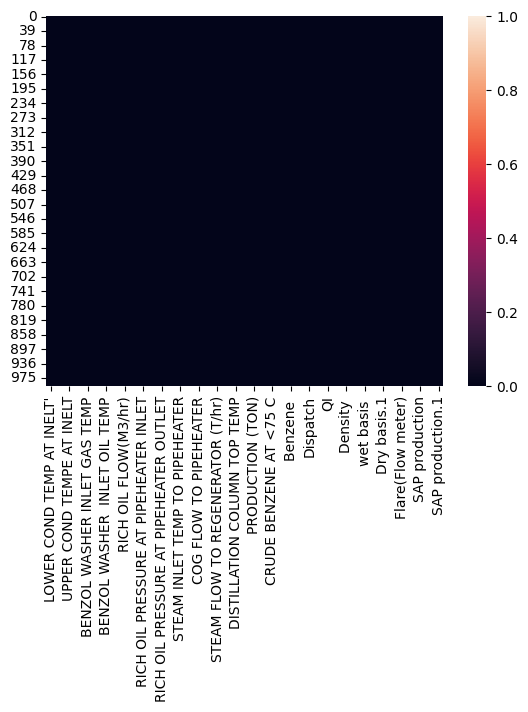

In [361]:
sns.heatmap(df.isnull())

In [362]:
df.corr()

C:\Users\tanmay pandey\AppData\Local\Temp\ipykernel_9276\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,LOWER COND TEMP AT INELT',LOWER COND TEMP AT OUTLET,UPPER COND TEMPE AT INELT,UPPER COND TEMPE AT OUTLET,BENZOL WASHER INLET GAS TEMP,BENZOL WASHER OUTLET GAS TEMP,BENZOL WASHER INLET OIL TEMP,BENZOL WASHER RESISTANCE,RICH OIL FLOW(M3/hr),RICH OIL INLET TEMP TO PIPEHEATER,...,Density,Dry basis,wet basis,Actual,Dry basis.1,Consumer(from FMD),Flare(Flow meter),SAP production,0,SAP production.1
LOWER COND TEMP AT INELT',1.000000,0.997197,0.041386,0.820384,0.890667,0.261289,0.123943,0.289780,0.036210,0.131051,...,-0.007994,-0.025506,-0.018462,-0.015118,-0.032787,0.089598,0.029681,0.007587,0.000710,-0.007754
LOWER COND TEMP AT OUTLET,0.997197,1.000000,0.044972,0.829250,0.890723,0.283101,0.142010,0.295023,0.040672,0.151710,...,-0.007116,-0.024472,-0.017246,-0.013870,-0.031852,0.091283,0.027963,0.009323,0.002159,-0.006805
UPPER COND TEMPE AT INELT,0.041386,0.044972,1.000000,0.033271,0.040174,0.015666,0.026398,0.003187,0.000386,0.010288,...,-0.005153,-0.011977,-0.005423,-0.006158,-0.012996,-0.005710,-0.001936,-0.004969,-0.011441,-0.006427
UPPER COND TEMPE AT OUTLET,0.820384,0.829250,0.033271,1.000000,0.721139,0.333546,0.129340,0.215152,0.039972,0.256517,...,-0.012354,-0.026057,-0.019842,-0.016992,-0.033369,0.072502,0.023782,0.001716,-0.005793,-0.013226
BENZOL WASHER INLET GAS TEMP,0.890667,0.890723,0.040174,0.721139,1.000000,0.266854,0.217570,0.363396,0.031740,0.099284,...,-0.016766,-0.032026,-0.025071,-0.022903,-0.041344,0.074620,0.026378,-0.000980,-0.007938,-0.015216
BENZOL WASHER OUTLET GAS TEMP,0.261289,0.283101,0.015666,0.333546,0.266854,1.000000,0.254690,0.115459,0.060136,0.530420,...,-0.032970,-0.036462,-0.034438,-0.035485,-0.046744,0.004211,0.008632,-0.035845,-0.043853,-0.045324
BENZOL WASHER INLET OIL TEMP,0.123943,0.142010,0.026398,0.129340,0.217570,0.254690,1.000000,0.248868,0.047918,0.245562,...,-0.082097,-0.089570,-0.083439,-0.081507,-0.103516,-0.017153,0.016556,-0.061788,-0.073778,-0.065553
BENZOL WASHER RESISTANCE,0.289780,0.295023,0.003187,0.215152,0.363396,0.115459,0.248868,1.000000,-0.001655,-0.160077,...,-0.007465,-0.005175,-0.006303,-0.008680,-0.006489,-0.029051,-0.007284,-0.009572,-0.008046,-0.003383
RICH OIL FLOW(M3/hr),0.036210,0.040672,0.000386,0.039972,0.031740,0.060136,0.047918,-0.001655,1.000000,0.086933,...,-0.007457,-0.009627,-0.009861,-0.007303,-0.005692,0.002028,0.001078,-0.006966,-0.005190,-0.008522
RICH OIL INLET TEMP TO PIPEHEATER,0.131051,0.151710,0.010288,0.256517,0.099284,0.530420,0.245562,-0.160077,0.086933,1.000000,...,-0.016723,-0.016305,-0.014482,-0.017018,-0.028749,-0.000180,0.011232,-0.018307,-0.029423,-0.031628


C:\Users\tanmay pandey\AppData\Local\Temp\ipykernel_9276\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

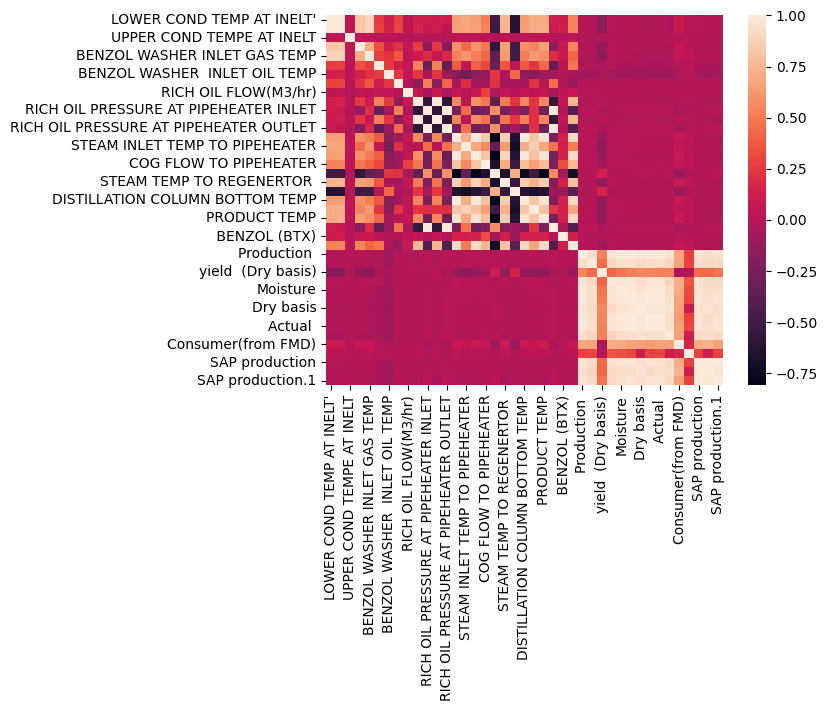

In [363]:
sns.heatmap(df.corr())

C:\Users\tanmay pandey\AppData\Local\Temp\ipykernel_9276\1144251945.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() > 0.5)


<Axes: >

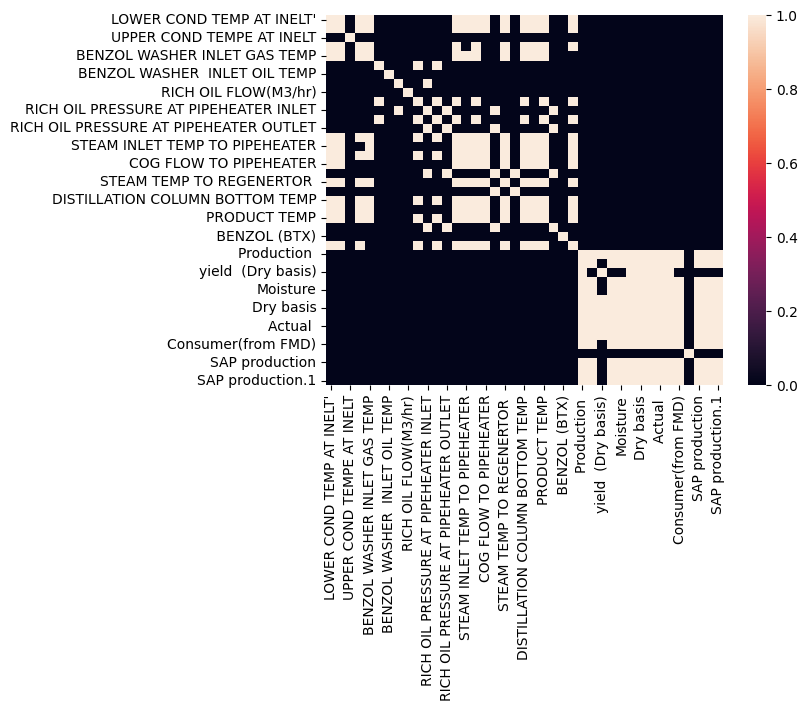

In [364]:
sns.heatmap(df.corr() > 0.5)

In [365]:
df1  = (df.corr() > 0)["PRODUCTION (TON)"]

C:\Users\tanmay pandey\AppData\Local\Temp\ipykernel_9276\3942582788.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1  = (df.corr() > 0)["PRODUCTION (TON)"]


In [366]:
 (df.corr() > 0.5)["PRODUCTION (TON)"]

C:\Users\tanmay pandey\AppData\Local\Temp\ipykernel_9276\1578411262.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df.corr() > 0.5)["PRODUCTION (TON)"]


LOWER COND TEMP AT INELT'                  True
LOWER COND TEMP AT OUTLET                  True
UPPER COND TEMPE AT INELT                 False
UPPER COND TEMPE AT OUTLET                 True
BENZOL WASHER INLET GAS TEMP               True
BENZOL WASHER  OUTLET GAS TEMP            False
BENZOL WASHER  INLET OIL TEMP             False
BENZOL WASHER RESISTANCE                  False
RICH OIL FLOW(M3/hr)                      False
RICH OIL INLET TEMP TO PIPEHEATER         False
RICH OIL PRESSURE AT PIPEHEATER INLET     False
RICH OIL OUTLET TEMP FROM  PIPEHEATER     False
RICH OIL PRESSURE AT PIPEHEATER OUTLET    False
PIPEHEATER MIDDLE TEMP                     True
STEAM INLET TEMP TO PIPEHEATER             True
STEAM OUTLET TEMP FROM PIPEHEATER          True
COG FLOW TO PIPEHEATER                     True
STEAM FLOW TO REGENERATOR (T/hr)          False
STEAM TEMP TO REGENERTOR                   True
DISTILLATION COLUMN TOP TEMP              False
DISTILLATION COLUMN BOTTOM TEMP         

C:\Users\tanmay pandey\AppData\Local\Temp\ipykernel_9276\575813612.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() > 0.5)["PRODUCTION (TON)"]


TypeError: 'Axes' object is not subscriptable

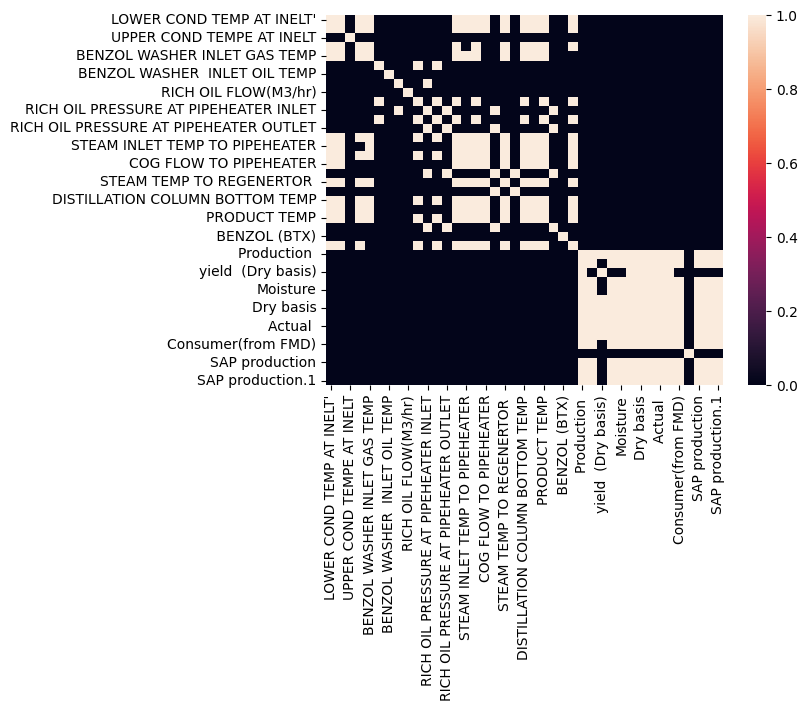

In [367]:
sns.heatmap(df.corr() > 0.5)["PRODUCTION (TON)"]

In [368]:
#corr > 0.5 

correlation_threshold = 0.5
correlation_with_production = df.corr()["PRODUCTION (TON)"]
columns_above_threshold = correlation_with_production[correlation_with_production > correlation_threshold].index

df1 = df[columns_above_threshold]




C:\Users\tanmay pandey\AppData\Local\Temp\ipykernel_9276\1342374792.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_production = df.corr()["PRODUCTION (TON)"]


In [369]:
#corr > 0

correlation_threshold = 0
correlation_with_production = df.corr()["PRODUCTION (TON)"]
columns_above_threshold = correlation_with_production[correlation_with_production > correlation_threshold].index

df_0 = df[columns_above_threshold]




C:\Users\tanmay pandey\AppData\Local\Temp\ipykernel_9276\6101139.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_production = df.corr()["PRODUCTION (TON)"]


In [370]:
df1.skew()

LOWER COND TEMP AT INELT'           -0.613290
LOWER COND TEMP AT OUTLET           -0.509538
UPPER COND TEMPE AT OUTLET           3.417215
BENZOL WASHER INLET GAS TEMP        -0.414222
PIPEHEATER MIDDLE TEMP              -1.015939
STEAM INLET TEMP TO PIPEHEATER      -0.540000
STEAM OUTLET TEMP FROM PIPEHEATER   -0.999699
COG FLOW TO PIPEHEATER               1.294214
STEAM TEMP TO REGENERTOR            -0.836371
DISTILLATION COLUMN BOTTOM TEMP     -0.981465
PRODUCTION (TON)                    -0.999149
PRODUCT TEMP                        -0.977741
Benzene                             -1.316925
dtype: float64

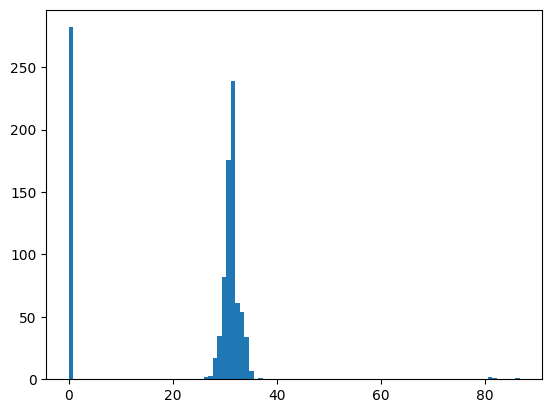

<Figure size 10000x600 with 0 Axes>

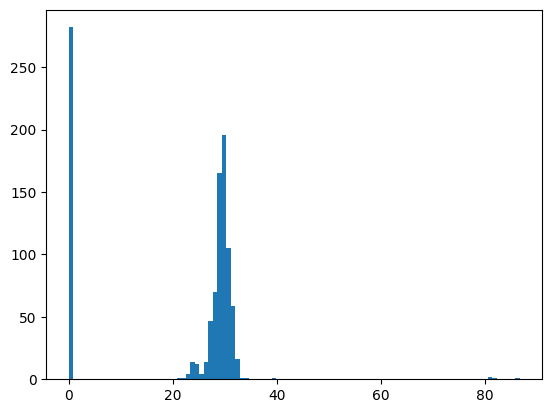

<Figure size 10000x600 with 0 Axes>

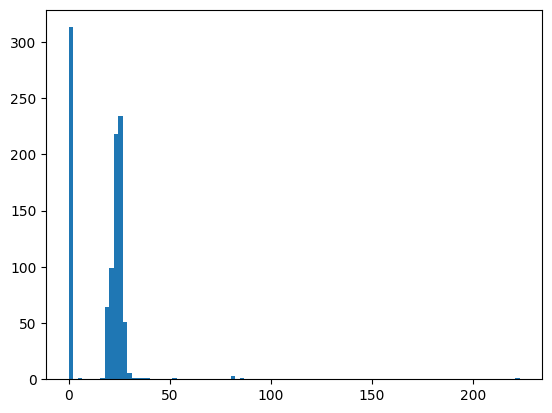

<Figure size 10000x600 with 0 Axes>

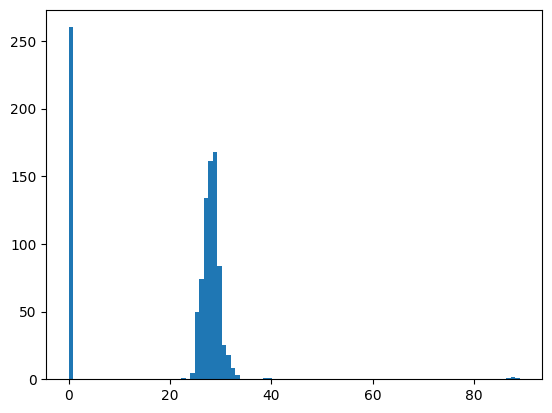

<Figure size 10000x600 with 0 Axes>

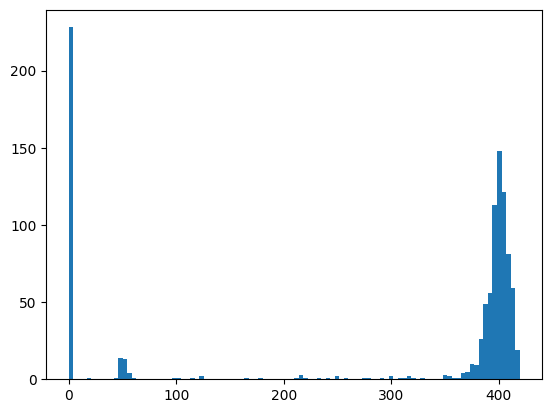

<Figure size 10000x600 with 0 Axes>

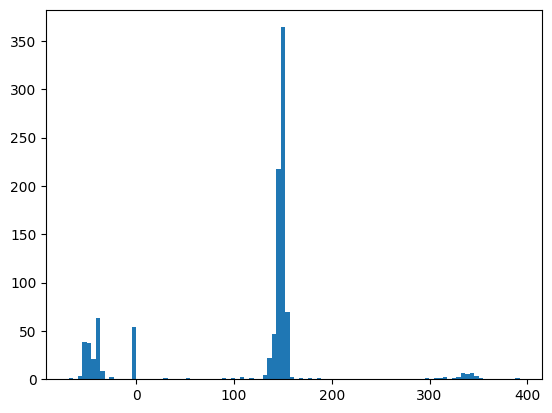

<Figure size 10000x600 with 0 Axes>

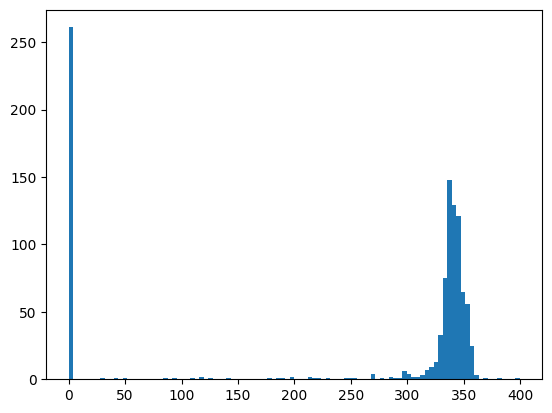

<Figure size 10000x600 with 0 Axes>

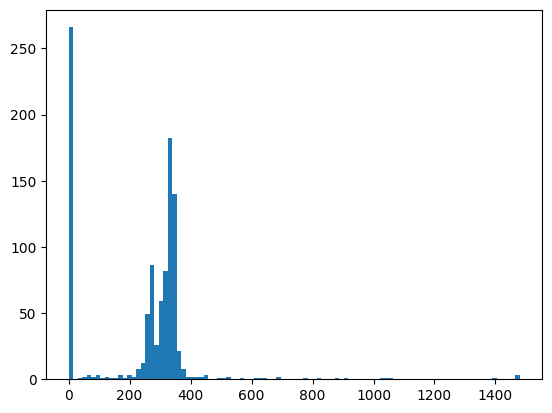

<Figure size 10000x600 with 0 Axes>

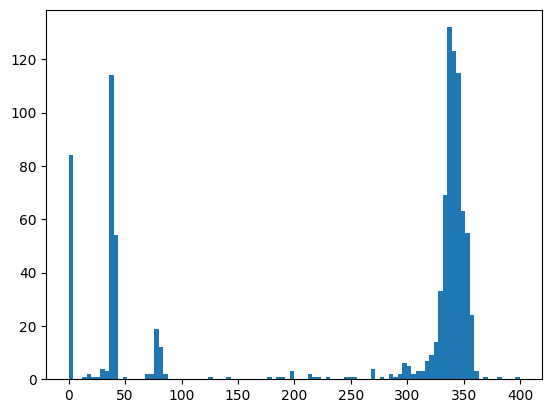

<Figure size 10000x600 with 0 Axes>

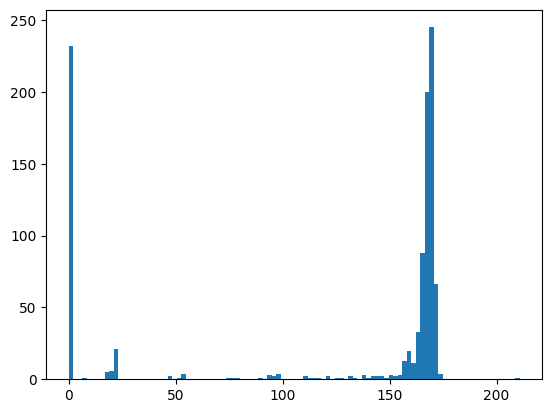

<Figure size 10000x600 with 0 Axes>

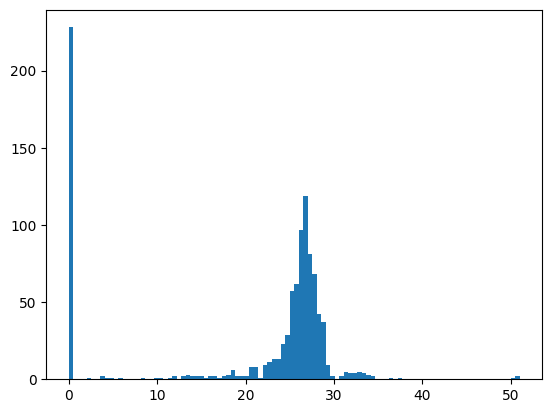

<Figure size 10000x600 with 0 Axes>

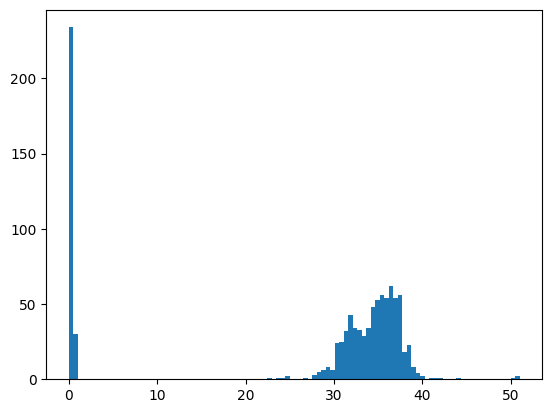

<Figure size 10000x600 with 0 Axes>

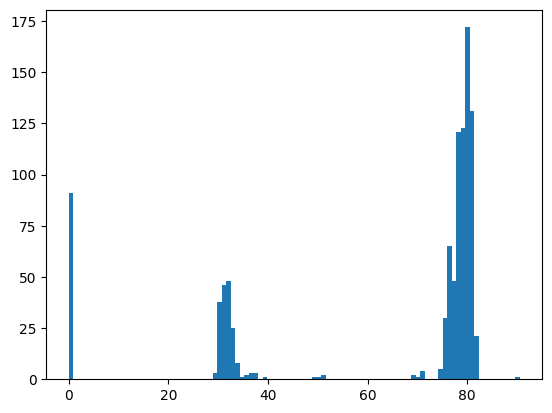

<Figure size 10000x600 with 0 Axes>

In [404]:
for i in df1 :
    plt.hist(df1[i],bins = 100)
    plt.figure(figsize=(100,6))
    
    plt.show()

C:\Users\tanmay pandey\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


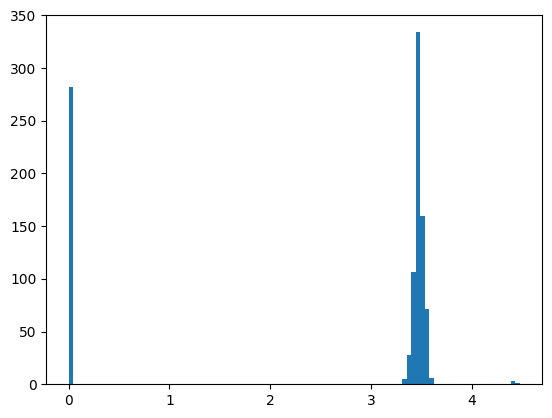

<Figure size 600x600 with 0 Axes>

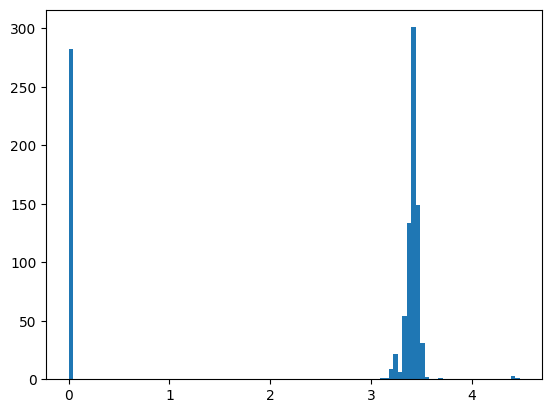

<Figure size 600x600 with 0 Axes>

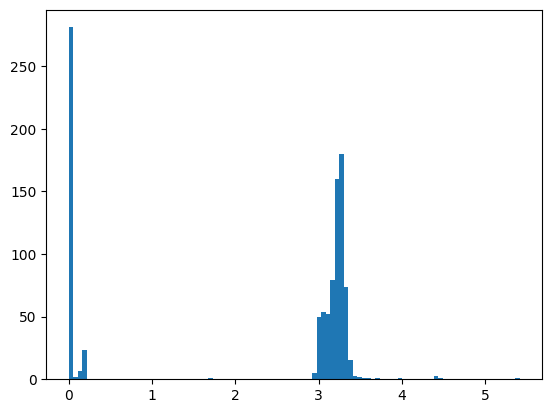

<Figure size 600x600 with 0 Axes>

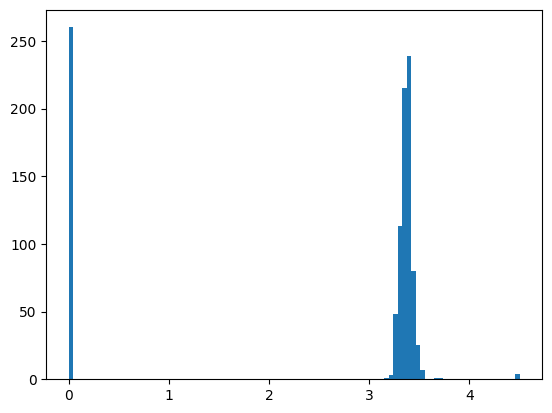

<Figure size 600x600 with 0 Axes>

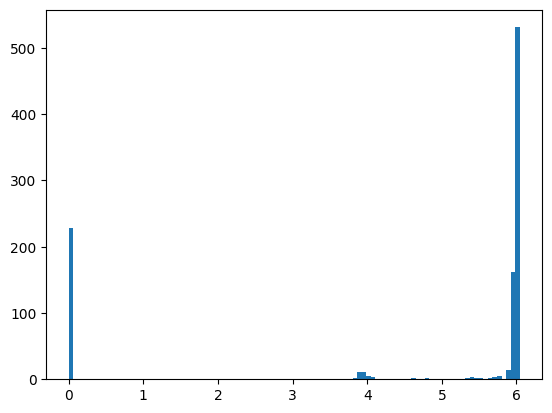

<Figure size 600x600 with 0 Axes>

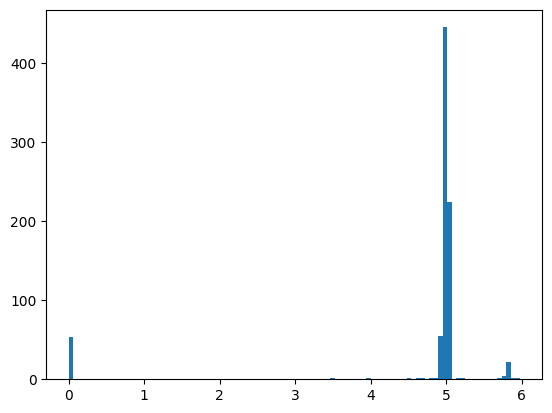

<Figure size 600x600 with 0 Axes>

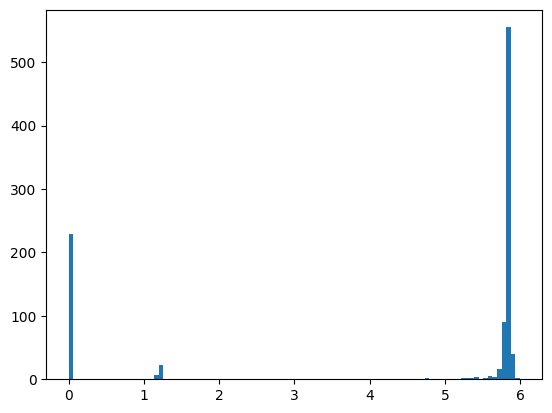

<Figure size 600x600 with 0 Axes>

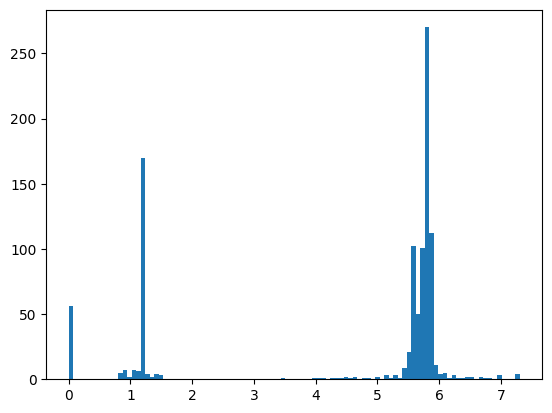

<Figure size 600x600 with 0 Axes>

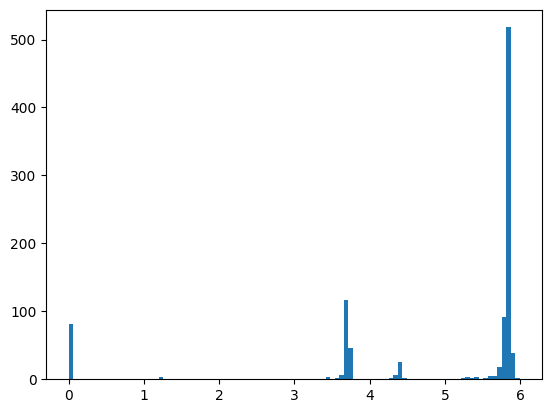

<Figure size 600x600 with 0 Axes>

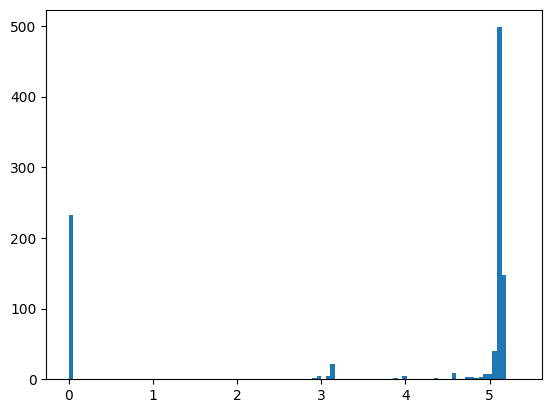

<Figure size 600x600 with 0 Axes>

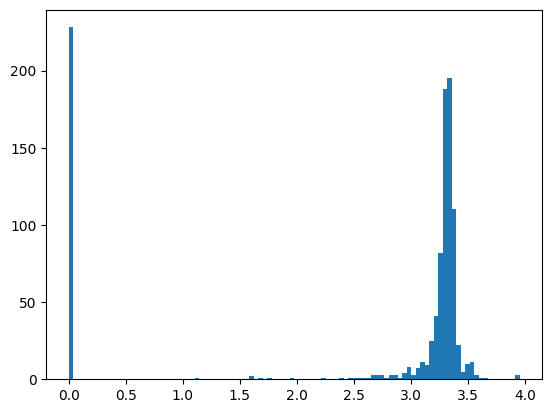

<Figure size 600x600 with 0 Axes>

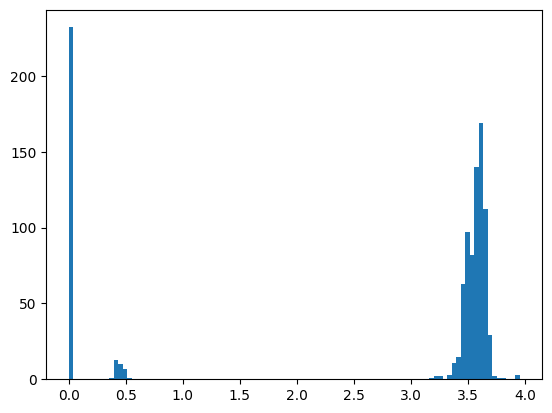

<Figure size 600x600 with 0 Axes>

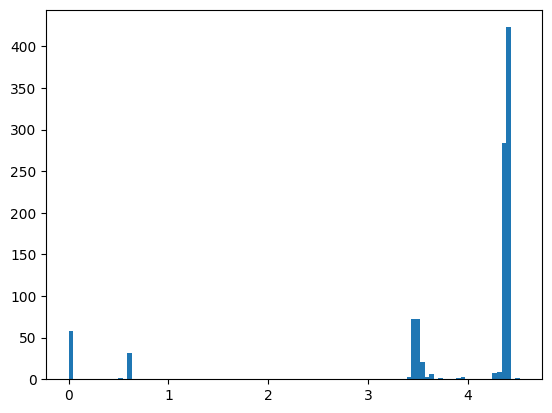

<Figure size 600x600 with 0 Axes>

In [405]:
df2 = np.log(df1+1)

for i in df2 :
    plt.hist(df2[i],bins = 100)
    plt.figure(figsize=(6,6))
    
    plt.show()

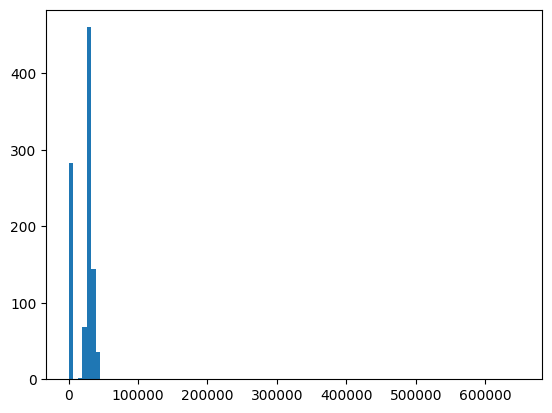

<Figure size 600x600 with 0 Axes>

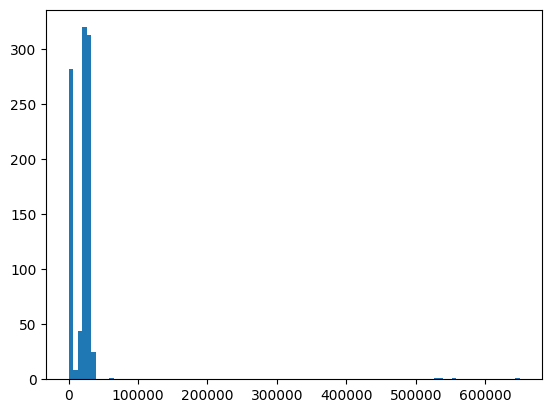

<Figure size 600x600 with 0 Axes>

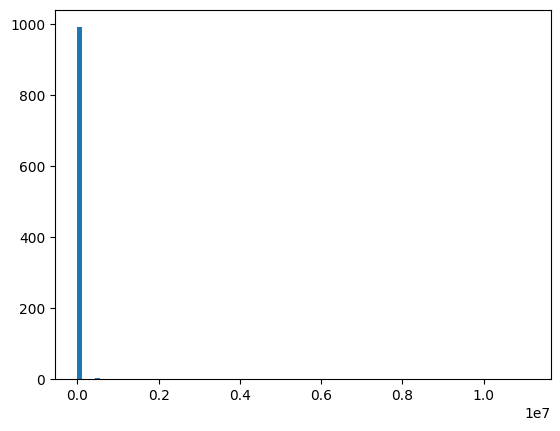

<Figure size 600x600 with 0 Axes>

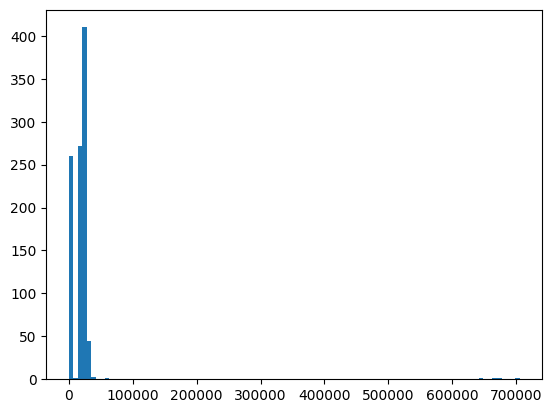

<Figure size 600x600 with 0 Axes>

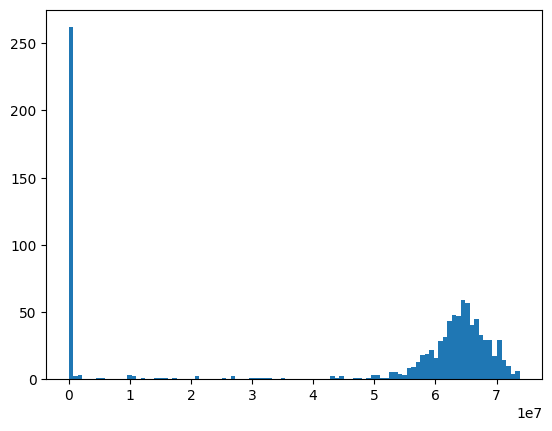

<Figure size 600x600 with 0 Axes>

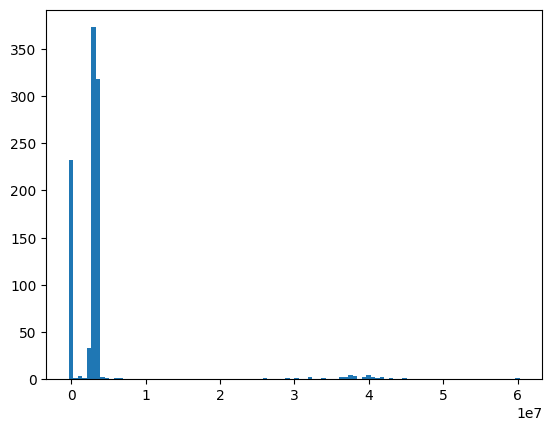

<Figure size 600x600 with 0 Axes>

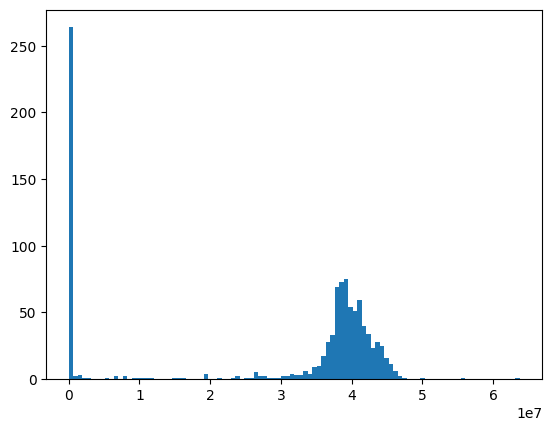

<Figure size 600x600 with 0 Axes>

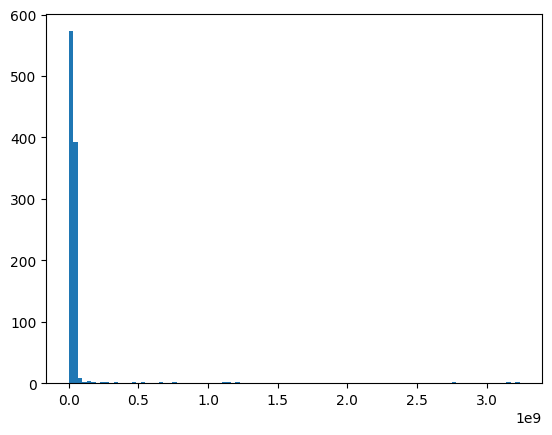

<Figure size 600x600 with 0 Axes>

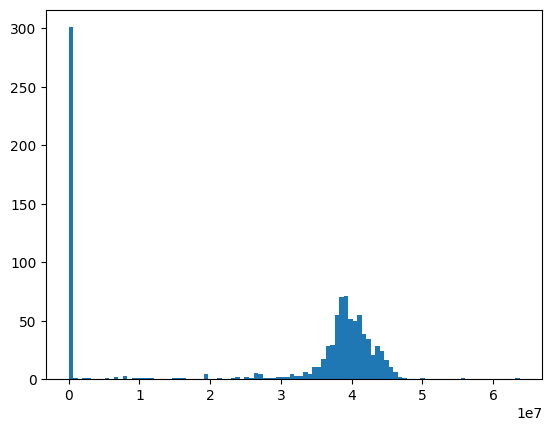

<Figure size 600x600 with 0 Axes>

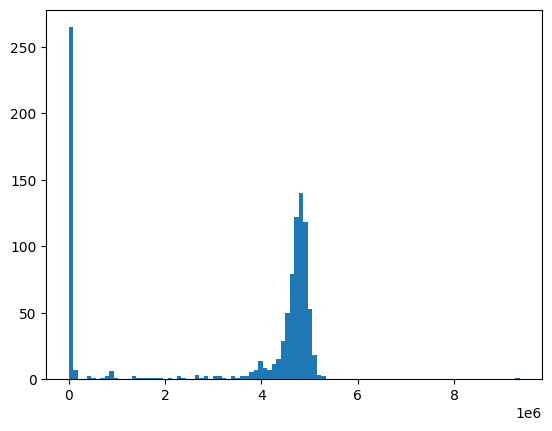

<Figure size 600x600 with 0 Axes>

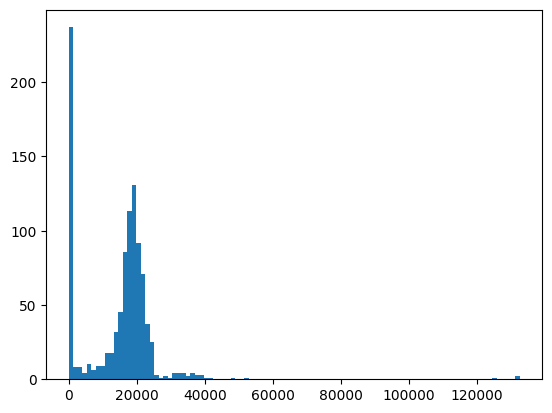

<Figure size 600x600 with 0 Axes>

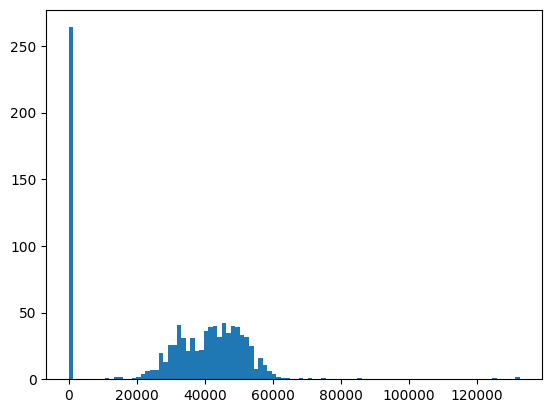

<Figure size 600x600 with 0 Axes>

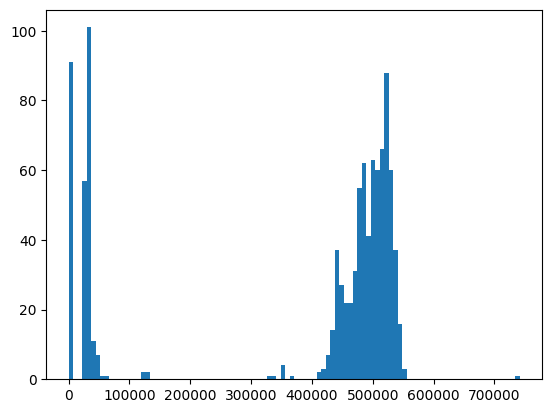

<Figure size 600x600 with 0 Axes>

In [406]:
df2 = np.power(df1,3)

for i in df2 :
    plt.hist(df2[i],bins = 100)
    plt.figure(figsize=(6,6))
    
    plt.show()

In [374]:
df1.skew() > 0

LOWER COND TEMP AT INELT'            False
LOWER COND TEMP AT OUTLET            False
UPPER COND TEMPE AT OUTLET            True
BENZOL WASHER INLET GAS TEMP         False
PIPEHEATER MIDDLE TEMP               False
STEAM INLET TEMP TO PIPEHEATER       False
STEAM OUTLET TEMP FROM PIPEHEATER    False
COG FLOW TO PIPEHEATER                True
STEAM TEMP TO REGENERTOR             False
DISTILLATION COLUMN BOTTOM TEMP      False
PRODUCTION (TON)                     False
PRODUCT TEMP                         False
Benzene                              False
dtype: bool

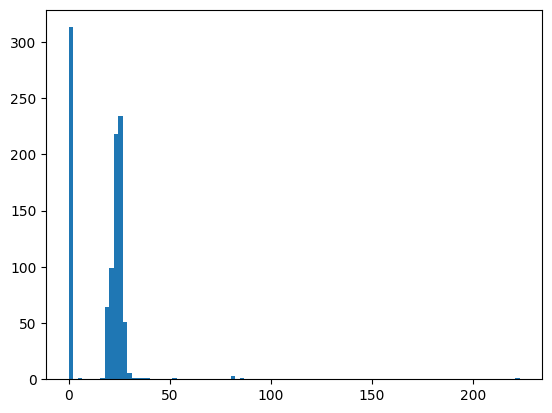

<Figure size 600x600 with 0 Axes>

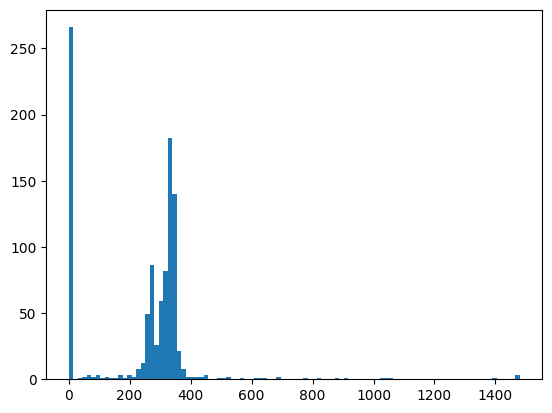

<Figure size 600x600 with 0 Axes>

In [407]:
for i in df1.iloc[1:,[2,7]] :
    plt.hist(df1[i],bins = 100)
    plt.figure(figsize=(6,6))
    
    plt.show()

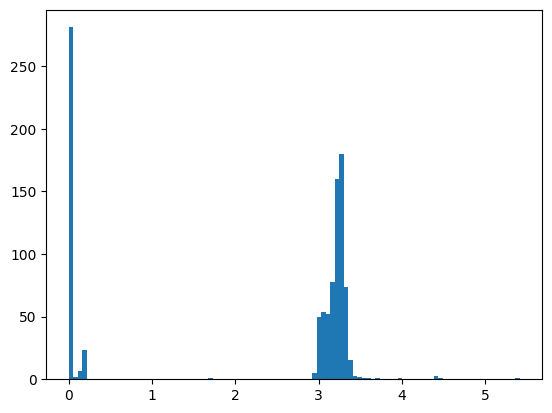

<Figure size 600x600 with 0 Axes>

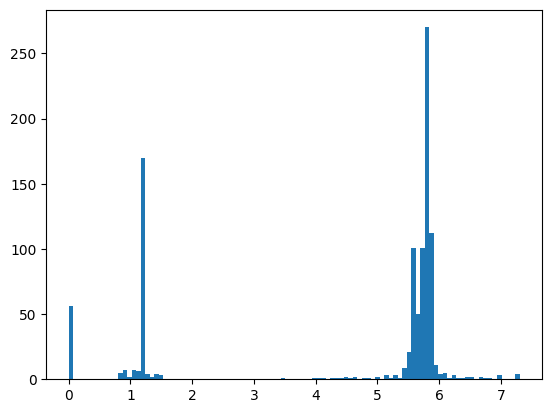

<Figure size 600x600 with 0 Axes>

In [408]:
df2 = np.log(df1.iloc[1:,[2,7]]+ 1)

for i in df2 :
    plt.hist(df2[i],bins = 100)
    plt.figure(figsize=(6,6))
    
    plt.show()

In [377]:
df1.skew() < 0

LOWER COND TEMP AT INELT'             True
LOWER COND TEMP AT OUTLET             True
UPPER COND TEMPE AT OUTLET           False
BENZOL WASHER INLET GAS TEMP          True
PIPEHEATER MIDDLE TEMP                True
STEAM INLET TEMP TO PIPEHEATER        True
STEAM OUTLET TEMP FROM PIPEHEATER     True
COG FLOW TO PIPEHEATER               False
STEAM TEMP TO REGENERTOR              True
DISTILLATION COLUMN BOTTOM TEMP       True
PRODUCTION (TON)                      True
PRODUCT TEMP                          True
Benzene                               True
dtype: bool

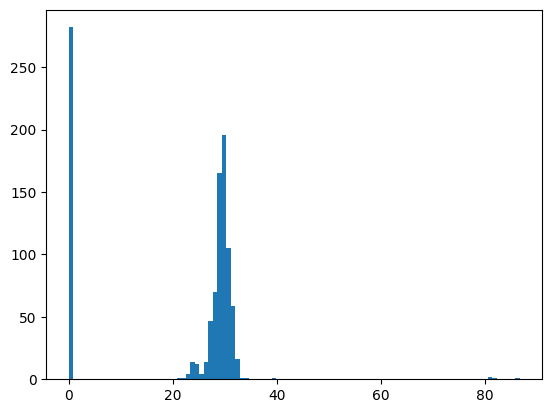

<Figure size 600x600 with 0 Axes>

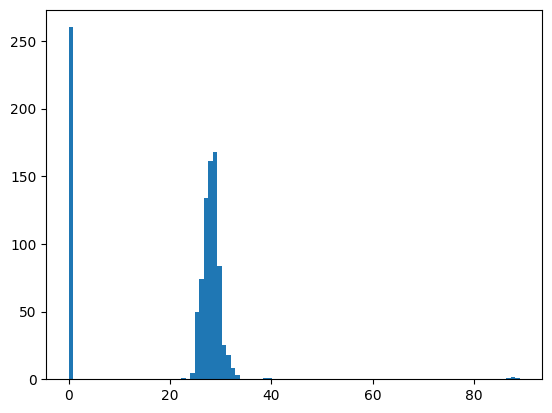

<Figure size 600x600 with 0 Axes>

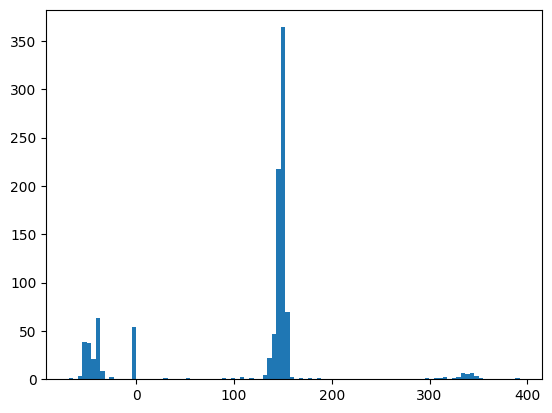

<Figure size 600x600 with 0 Axes>

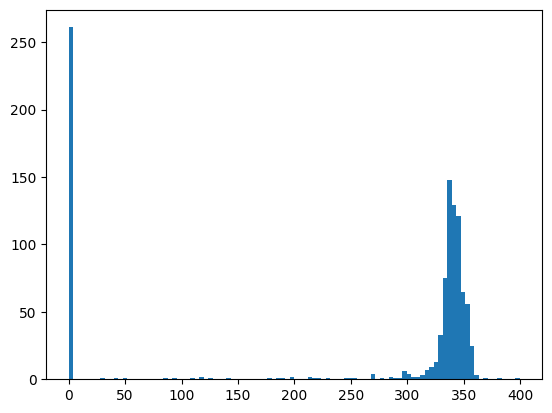

<Figure size 600x600 with 0 Axes>

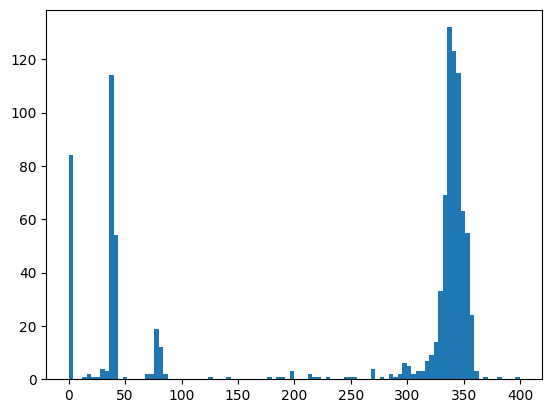

<Figure size 600x600 with 0 Axes>

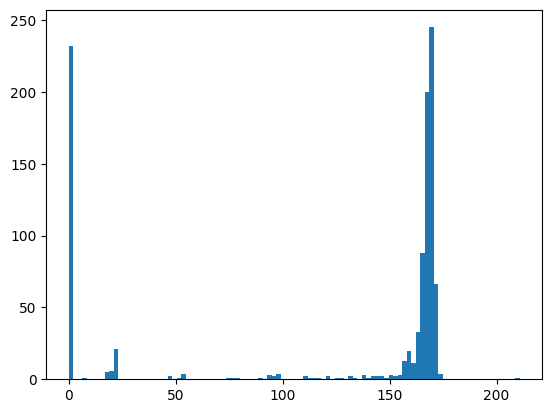

<Figure size 600x600 with 0 Axes>

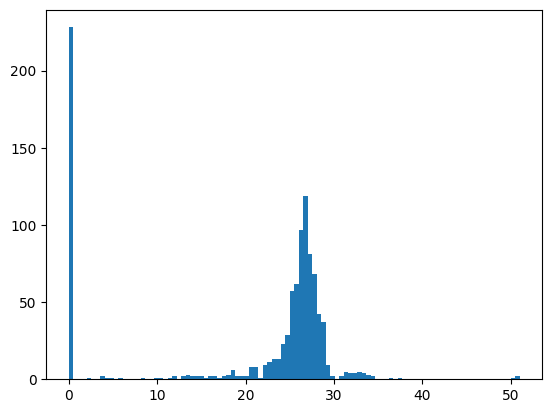

<Figure size 600x600 with 0 Axes>

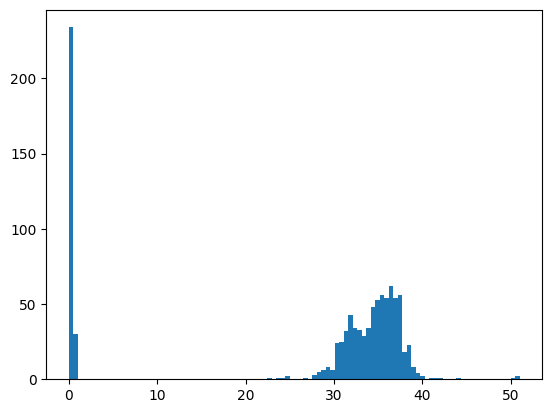

<Figure size 600x600 with 0 Axes>

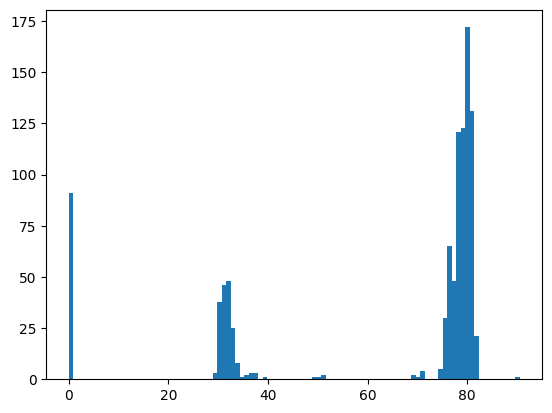

<Figure size 600x600 with 0 Axes>

In [409]:
for i in df1.iloc[1:,[1,3,5,6,8,9,10,11,12]] :
    plt.hist(df1[i],bins = 100)
    plt.figure(figsize=(6,6))
    
    plt.show()

C:\Users\tanmay pandey\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


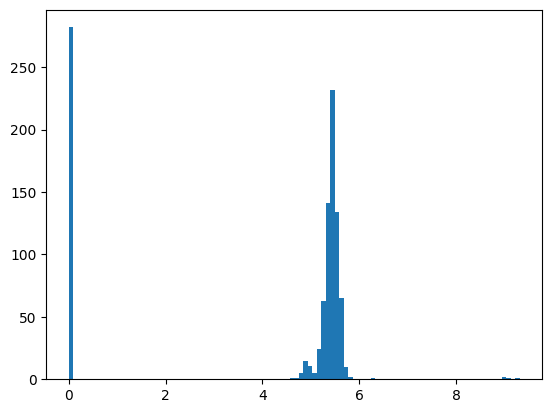

<Figure size 600x600 with 0 Axes>

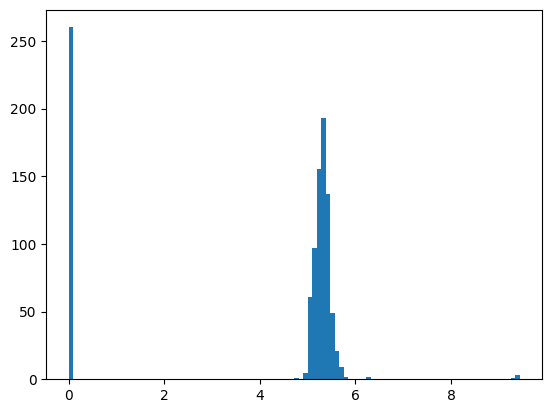

<Figure size 600x600 with 0 Axes>

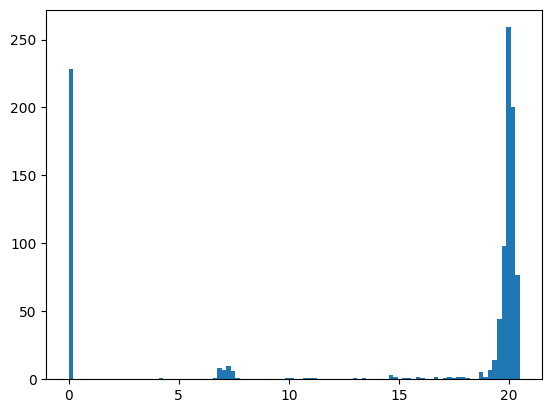

<Figure size 600x600 with 0 Axes>

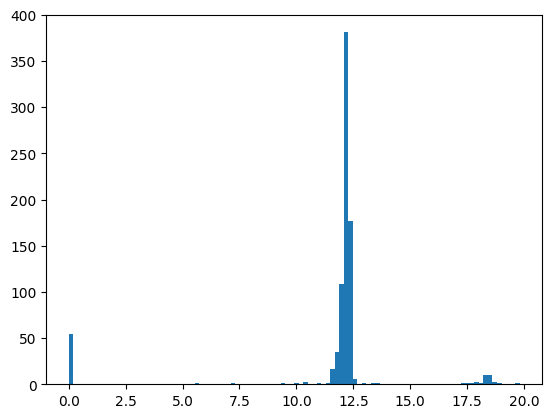

<Figure size 600x600 with 0 Axes>

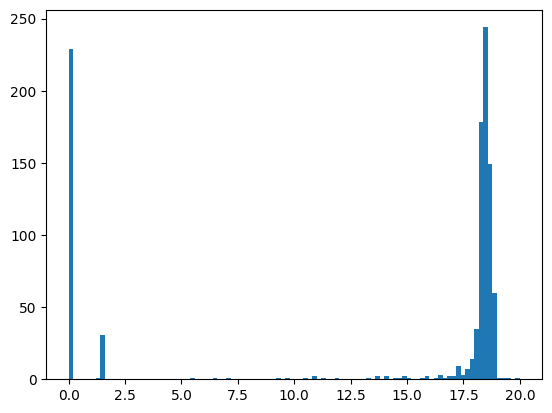

<Figure size 600x600 with 0 Axes>

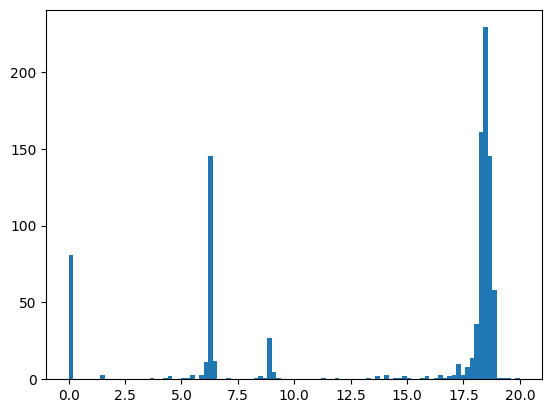

<Figure size 600x600 with 0 Axes>

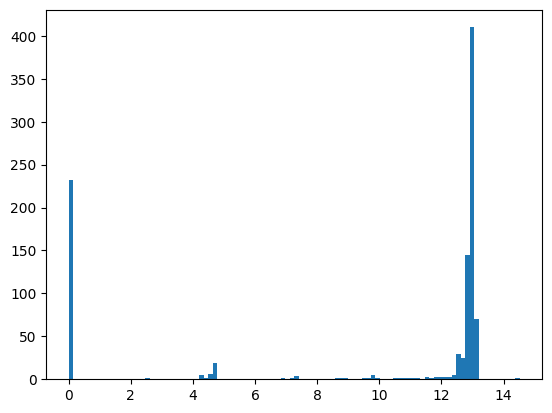

<Figure size 600x600 with 0 Axes>

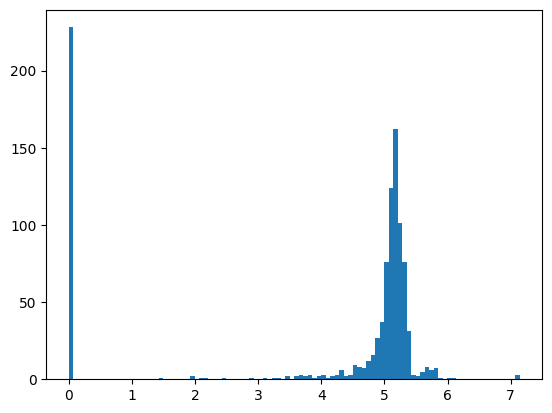

<Figure size 600x600 with 0 Axes>

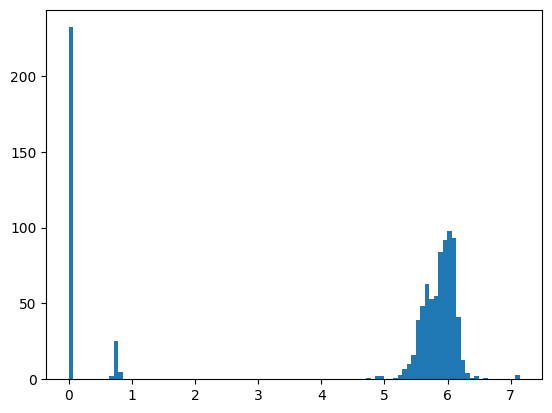

<Figure size 600x600 with 0 Axes>

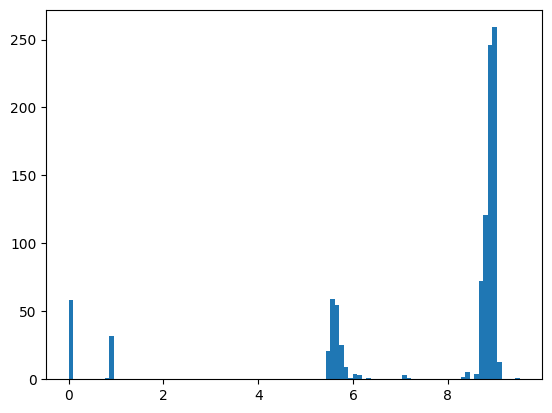

<Figure size 600x600 with 0 Axes>

In [410]:
df2 = np.sqrt(df1.iloc[1:,[1,3,4,5,6,8,9,10,11,12]])

for i in df2 :
    plt.hist(df2[i],bins = 100)
    plt.figure(figsize=(6,6))
    
    plt.show()

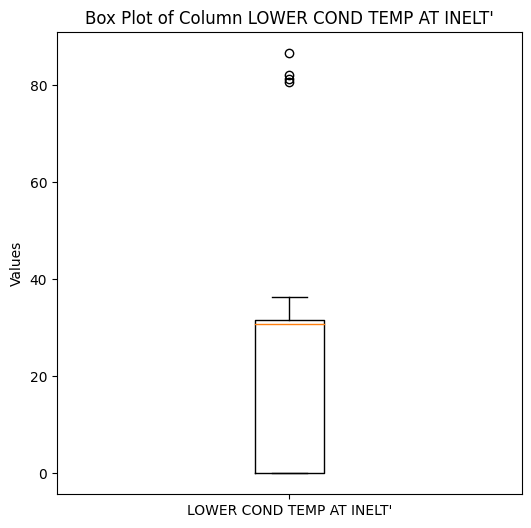

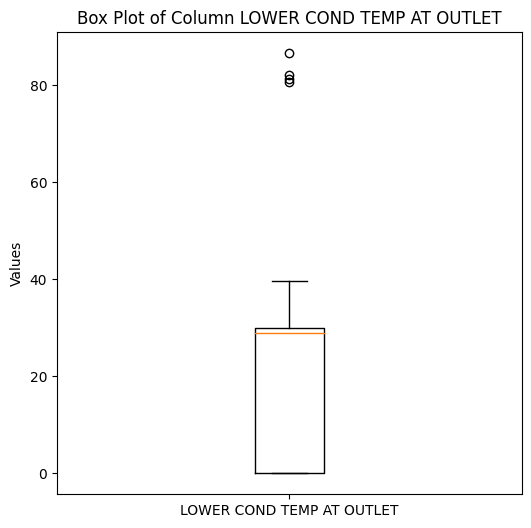

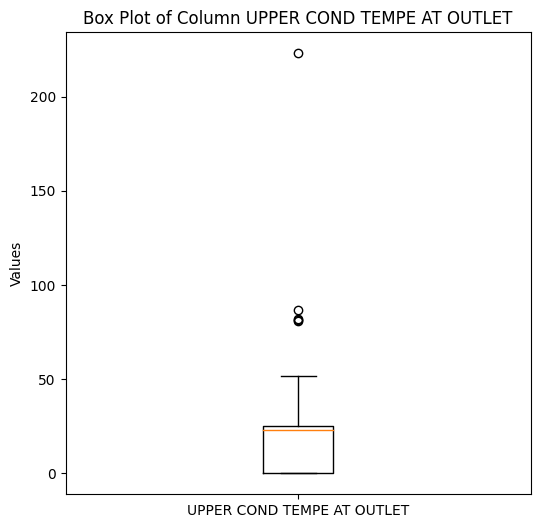

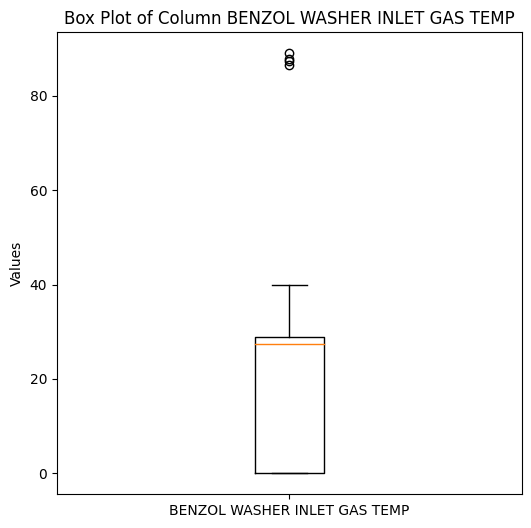

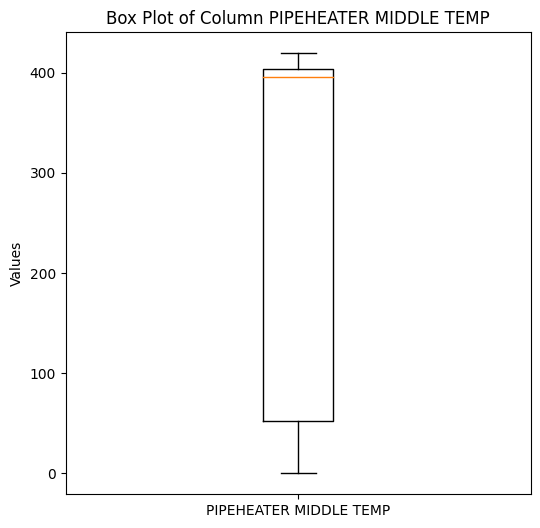

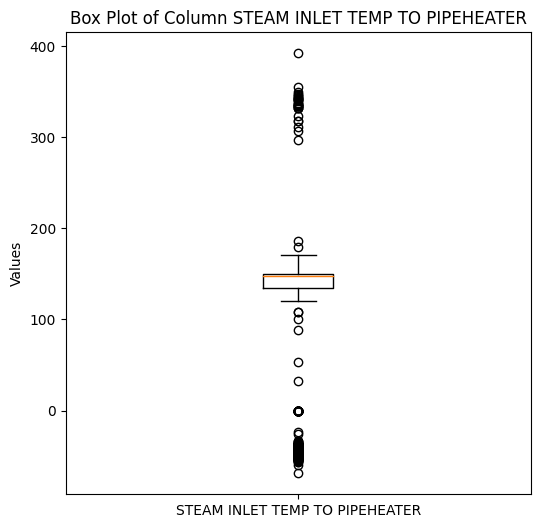

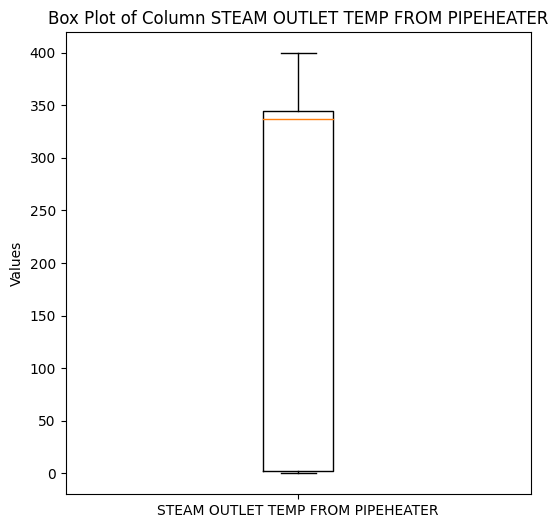

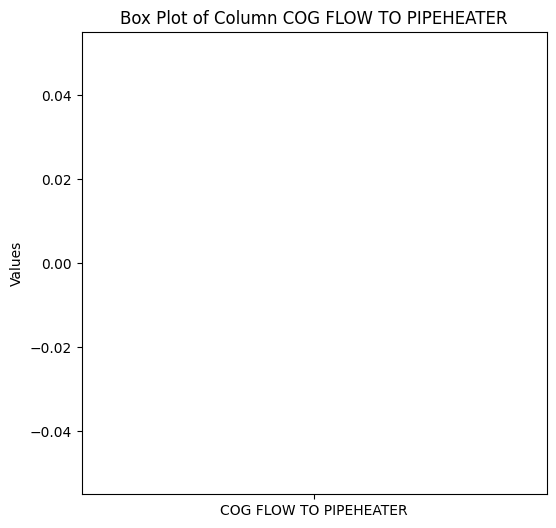

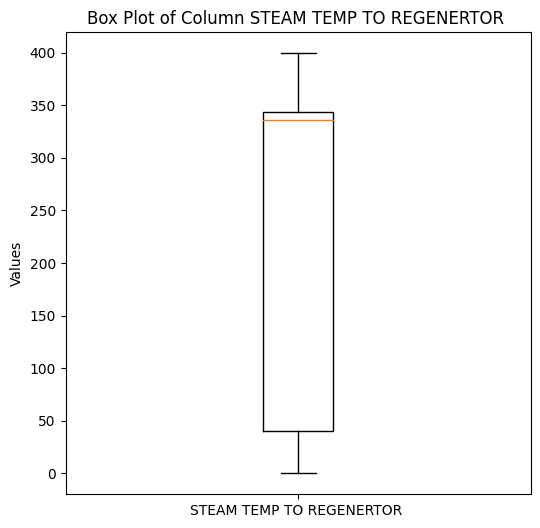

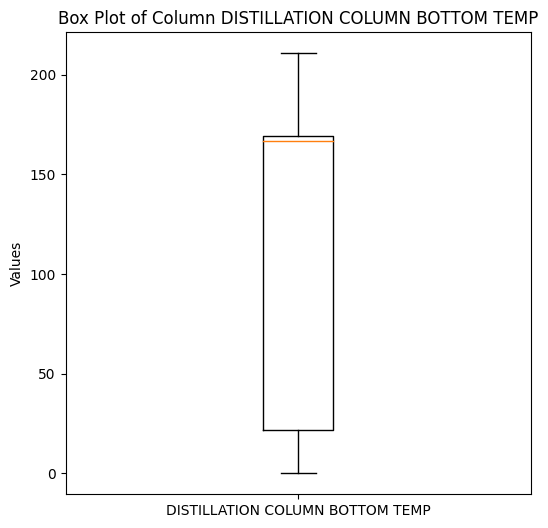

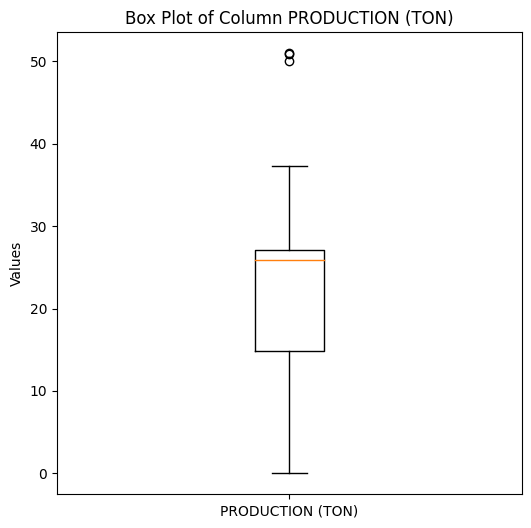

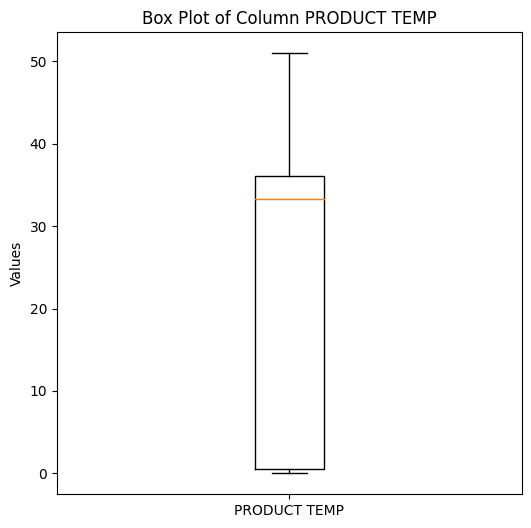

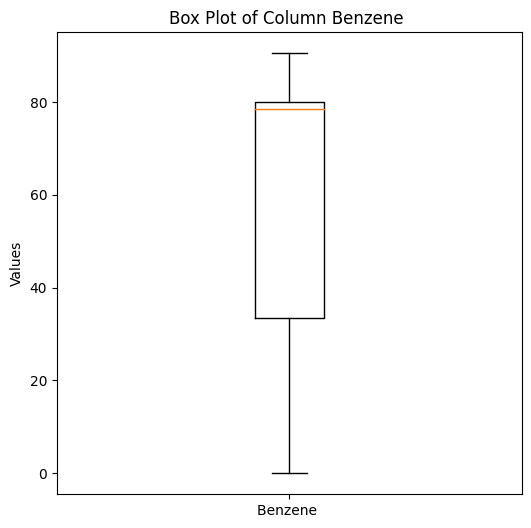

In [380]:
# Create box plots for each column
for column in df1:
    plt.figure(figsize=(6, 6))
    plt.boxplot(df1[column])
    plt.title(f'Box Plot of Column {column}')
    plt.ylabel('Values')
    plt.xticks([1], [column])  # Set the x-axis label as the column name
    plt.show()

In [381]:
df1.isnull().sum()

LOWER COND TEMP AT INELT'            0
LOWER COND TEMP AT OUTLET            0
UPPER COND TEMPE AT OUTLET           0
BENZOL WASHER INLET GAS TEMP         0
PIPEHEATER MIDDLE TEMP               0
STEAM INLET TEMP TO PIPEHEATER       0
STEAM OUTLET TEMP FROM PIPEHEATER    0
COG FLOW TO PIPEHEATER               1
STEAM TEMP TO REGENERTOR             0
DISTILLATION COLUMN BOTTOM TEMP      0
PRODUCTION (TON)                     0
PRODUCT TEMP                         0
Benzene                              0
dtype: int64

In [388]:
df1.isnull().sum()
df1.dropna()

,LOWER COND TEMP AT INELT',LOWER COND TEMP AT OUTLET,UPPER COND TEMPE AT OUTLET,BENZOL WASHER INLET GAS TEMP,PIPEHEATER MIDDLE TEMP,STEAM INLET TEMP TO PIPEHEATER,STEAM OUTLET TEMP FROM PIPEHEATER,COG FLOW TO PIPEHEATER,STEAM TEMP TO REGENERTOR,DISTILLATION COLUMN BOTTOM TEMP,PRODUCTION (TON),PRODUCT TEMP,Benzene
0,33.99,30.02,22.18,27.58,390.58,133.11,340.52,265.83,340.52,168.22,26.09,36.29,78.96
1,34.29,31.00,22.75,27.39,392.79,134.12,341.95,261.87,341.95,168.92,27.43,36.20,78.77
2,34.11,31.92,22.81,27.59,391.80,134.66,339.89,259.53,339.89,168.18,26.01,35.32,78.81
3,33.75,31.16,23.54,28.11,391.70,135.75,338.70,263.00,338.70,167.70,25.11,36.40,78.67
4,33.12,30.58,23.25,28.60,387.90,135.33,339.00,260.00,339.00,167.00,25.29,36.30,78.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
993,34.38,31.44,23.20,29.70,387.97,152.14,339.77,272.61,339.77,168.71,27.91,37.77,78.03
994,34.54,31.72,23.26,29.71,384.10,153.58,343.91,272.96,339.78,169.56,26.33,38.21,78.38
995,34.30,31.89,23.43,29.62,386.41,152.50,354.16,270.89,354.16,168.84,26.75,37.73,78.35


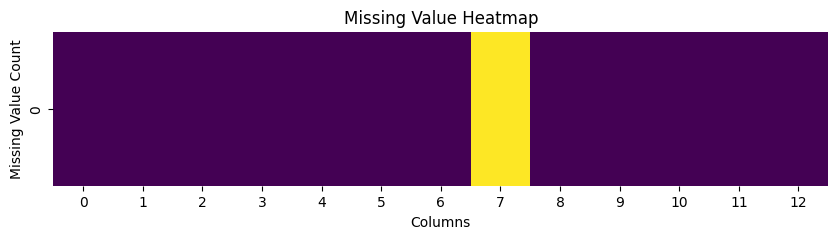

In [389]:
# Calculate the missing value count for each column
missing_counts = df1.isnull().sum()

# Reshape the missing counts for visualization
missing_matrix = missing_counts.values.reshape(1, -1)

# Create a heatmap to visualize missing values
plt.figure(figsize=(10, 2))
sns.heatmap(data=missing_matrix, cmap='viridis', cbar=False)
plt.xlabel('Columns')
plt.ylabel('Missing Value Count')
plt.title('Missing Value Heatmap')
plt.show()

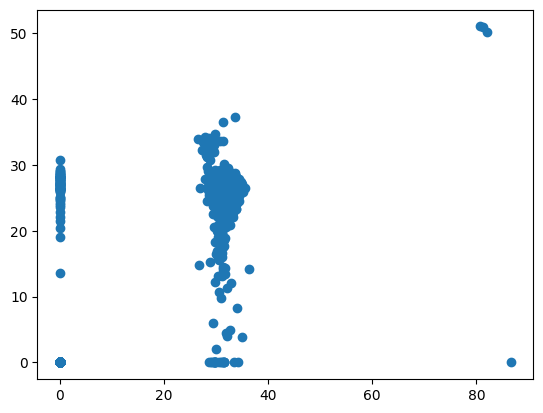

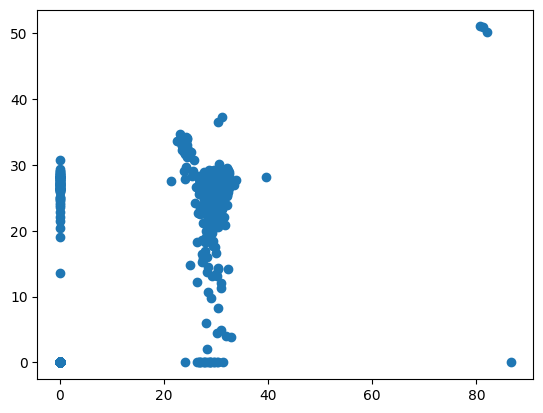

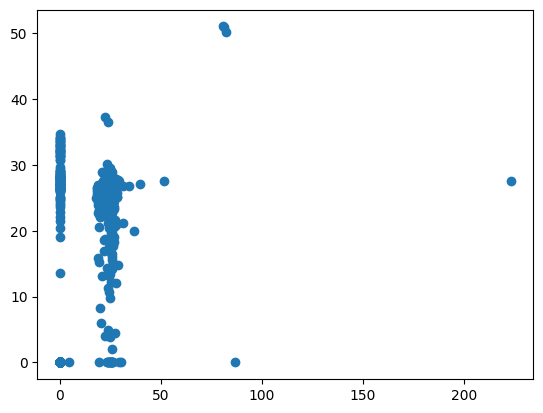

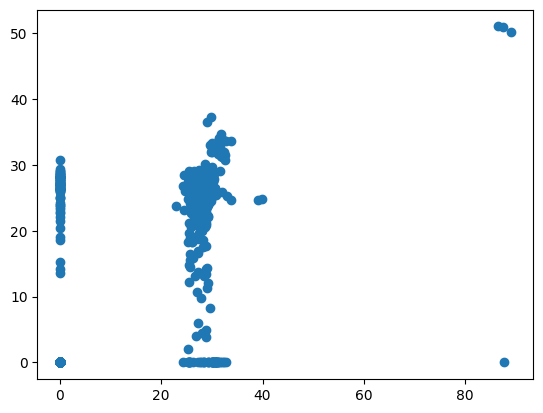

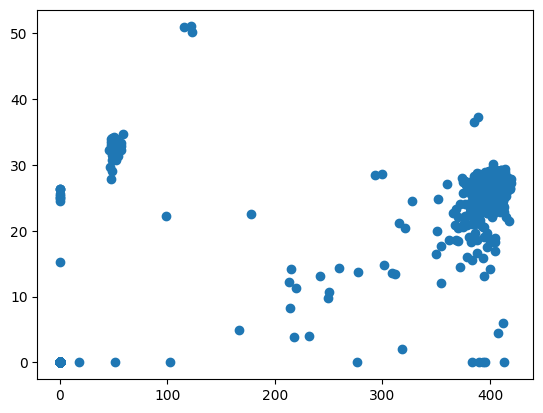

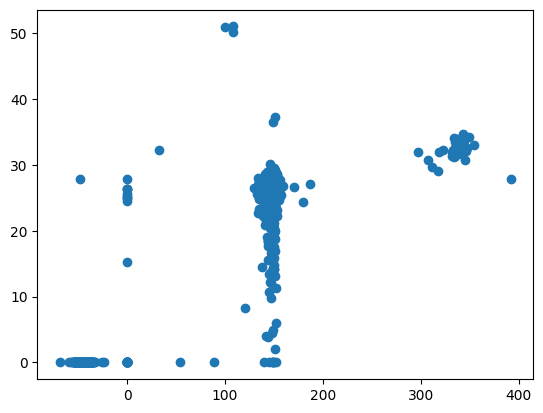

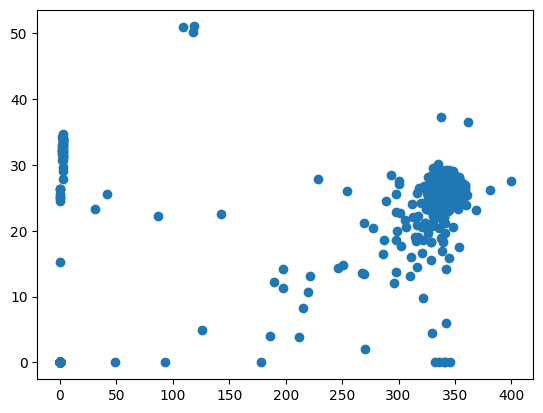

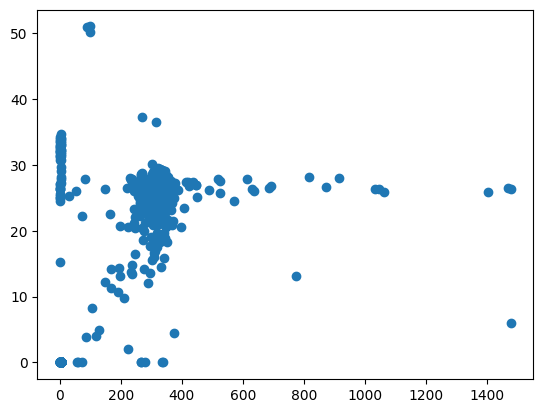

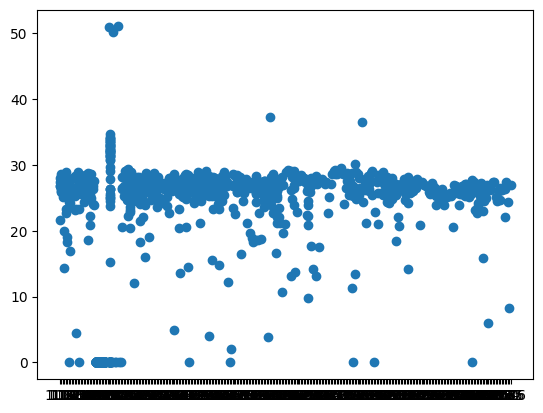

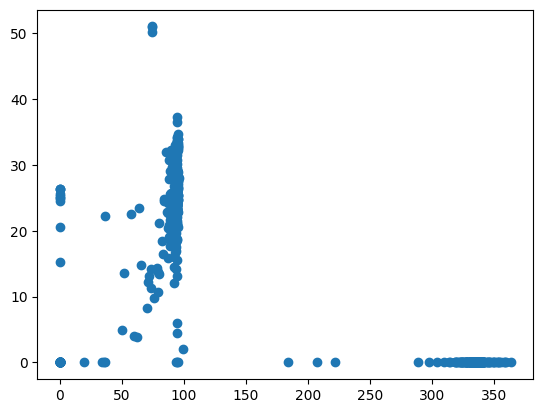

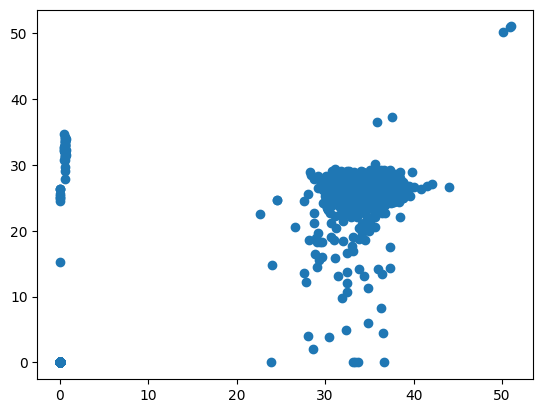

In [413]:
l = df.iloc[1:,[0,1,3,4,13,14,15,16,17,20,23]]

for i in l :
    plt.scatter(x = l[i] , y = df.iloc[1:,22])
    plt.show()

In [393]:
X = df.iloc[2:,[0,1,3,4,13,14,15,16,17,20,23]].values
X[X == '.1.83'] = np.nan


y = df.iloc[2:,22]
y[y == '.1.83'] = np.nan

# Convert X to float array
X = X.astype(float)



# Convert y to float array
y = y.astype(float)



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)




# Create a Decision Tree Regressor model
dt_model = DecisionTreeRegressor()

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Predict on the testing data
dt_y_pred = dt_model.predict(X_test)

dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)



print("Decision Tree - Mean Squared Error:", dt_mse)
print("Decision Tree - R^2 Score:", dt_r2)

Decision Tree - Mean Squared Error: 13.94192976369173
Decision Tree - R^2 Score: 0.8888630329966686


In [422]:
(df.corr() < 0 )["PRODUCTION (TON)"] 

C:\Users\tanmay pandey\AppData\Local\Temp\ipykernel_9276\442025425.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df.corr() < 0 )["PRODUCTION (TON)"]


LOWER COND TEMP AT INELT'                 False
LOWER COND TEMP AT OUTLET                 False
UPPER COND TEMPE AT INELT                 False
UPPER COND TEMPE AT OUTLET                False
BENZOL WASHER INLET GAS TEMP              False
BENZOL WASHER  OUTLET GAS TEMP            False
BENZOL WASHER  INLET OIL TEMP              True
BENZOL WASHER RESISTANCE                  False
RICH OIL FLOW(M3/hr)                      False
RICH OIL INLET TEMP TO PIPEHEATER         False
RICH OIL PRESSURE AT PIPEHEATER INLET     False
RICH OIL OUTLET TEMP FROM  PIPEHEATER     False
RICH OIL PRESSURE AT PIPEHEATER OUTLET    False
PIPEHEATER MIDDLE TEMP                    False
STEAM INLET TEMP TO PIPEHEATER            False
STEAM OUTLET TEMP FROM PIPEHEATER         False
COG FLOW TO PIPEHEATER                    False
STEAM FLOW TO REGENERATOR (T/hr)           True
STEAM TEMP TO REGENERTOR                  False
DISTILLATION COLUMN TOP TEMP               True
DISTILLATION COLUMN BOTTOM TEMP         

BENZOL WASHER  INLET OIL TEMP
STEAM FLOW TO REGENERATOR (T/hr)
STEAM TEMP TO REGENERTOR
DISTILLATION COLUMN TOP TEMP
yield  (Dry basis)
Dry basis                                  
wet basis                                  
Actual                                     
Dry basis.1                                
SAP production                             
0                                          


s = df.iloc[1:,[6,17,18,19,28,32,33,34,35,38,39,40]]
SAP production.1                           

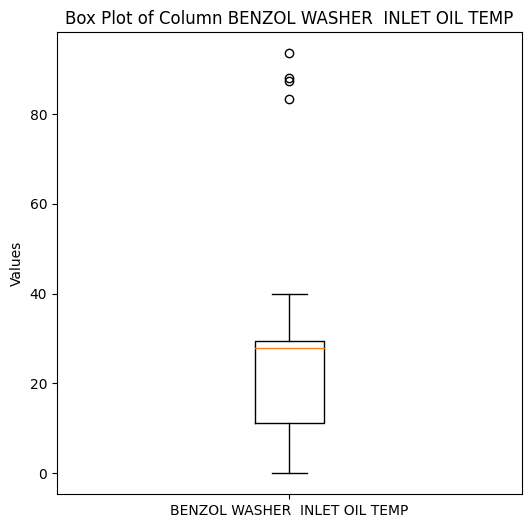

Error processing column 'COG PRESSURE TO PIPEHEATER': ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''


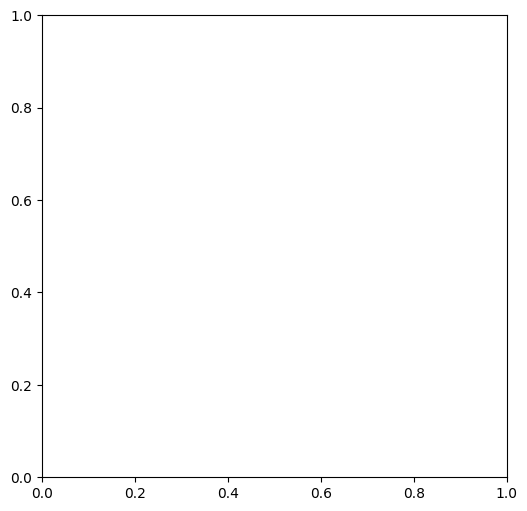

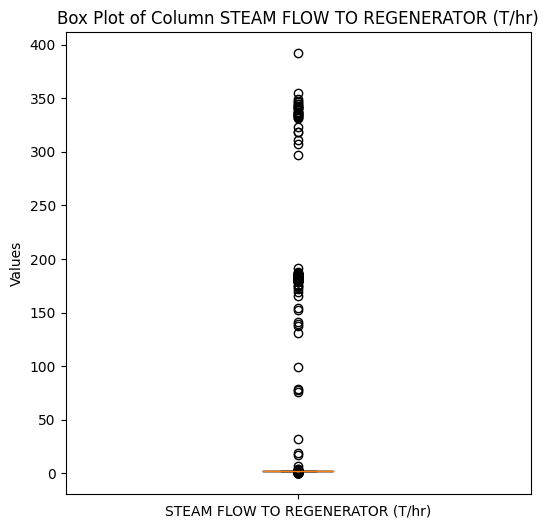

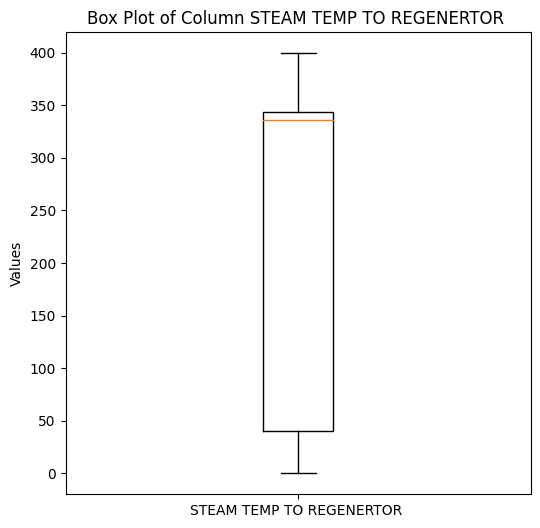

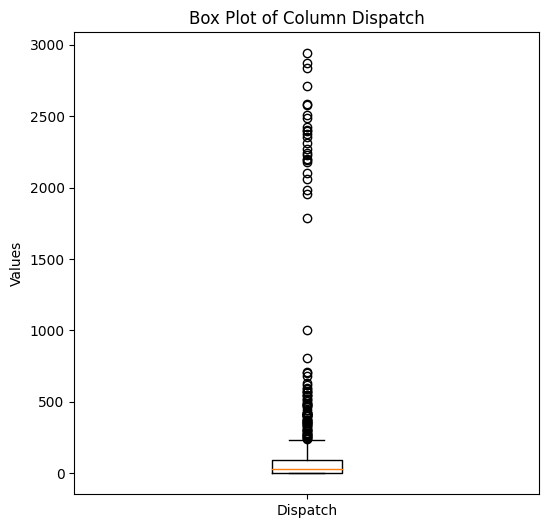

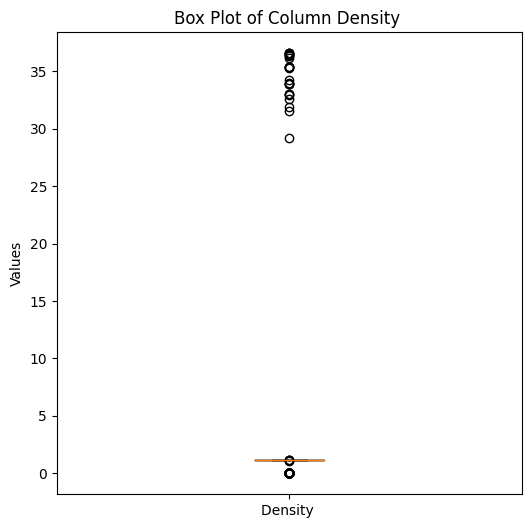

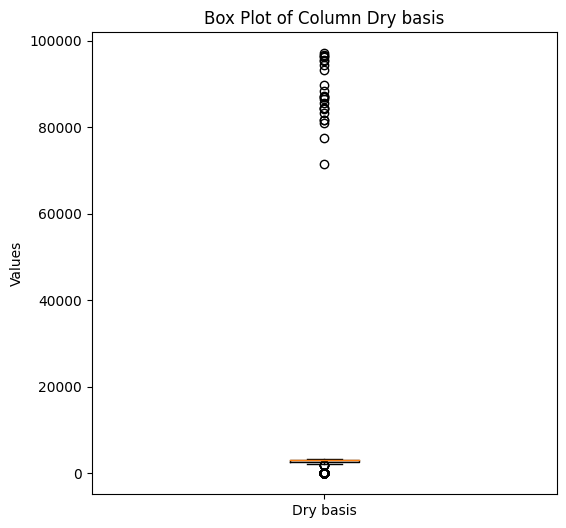

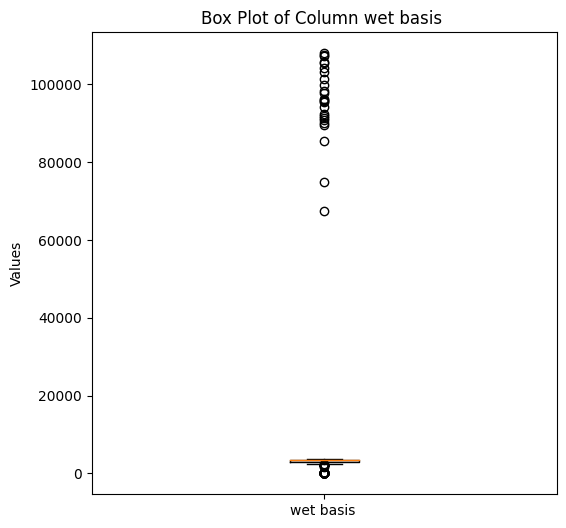

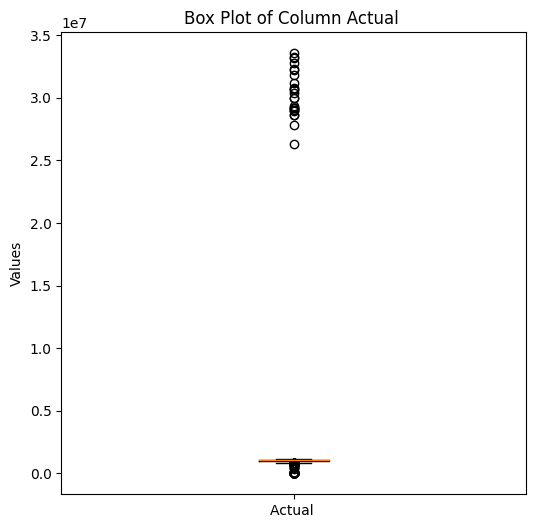

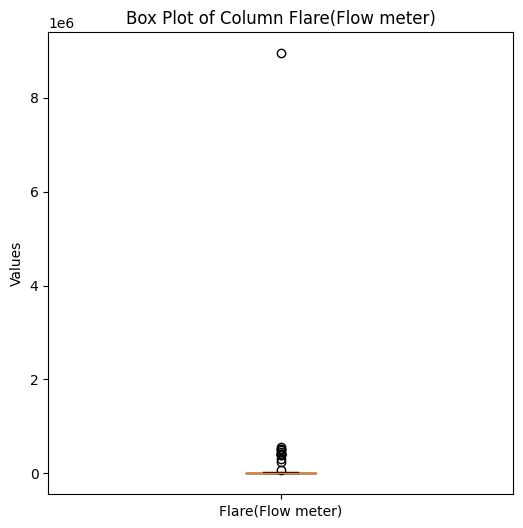

Error processing column 'Tot Gas to Battry': ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''


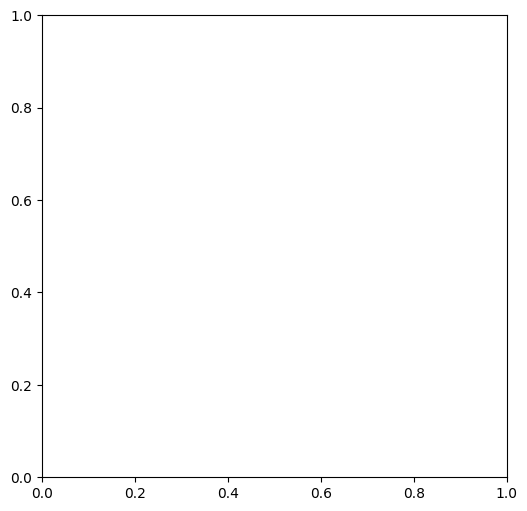

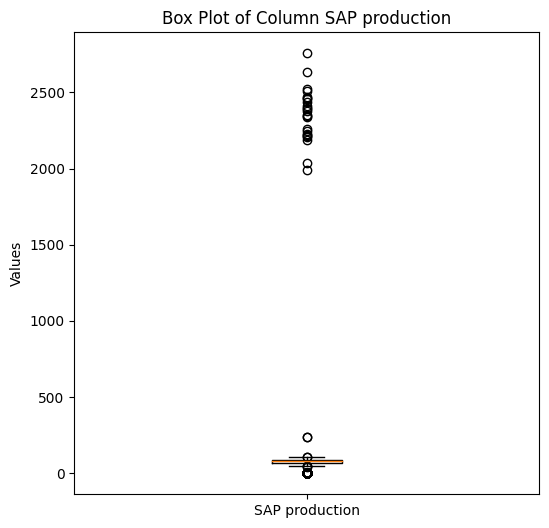

In [429]:
s = df.iloc[1:,[6,17,18,19,28,32,33,34,35,38,39,40]]
for i in s:
    try:
        plt.figure(figsize=(6, 6))
        plt.boxplot(s[i].dropna())
        plt.title(f'Box Plot of Column {i}')
        plt.ylabel('Values')
        plt.xticks([1], [i])  # Set the x-axis label as the column name
        plt.show()
    except Exception as e:
        print(f"Error processing column '{i}': {e}")


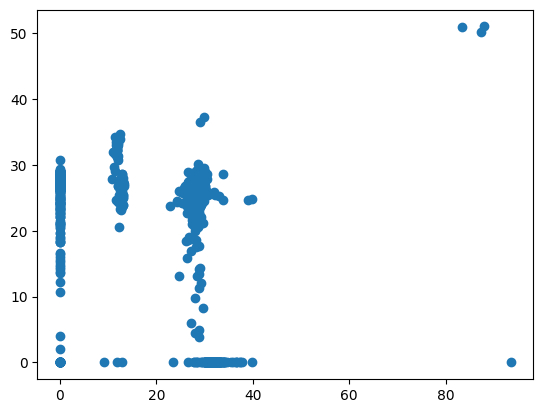

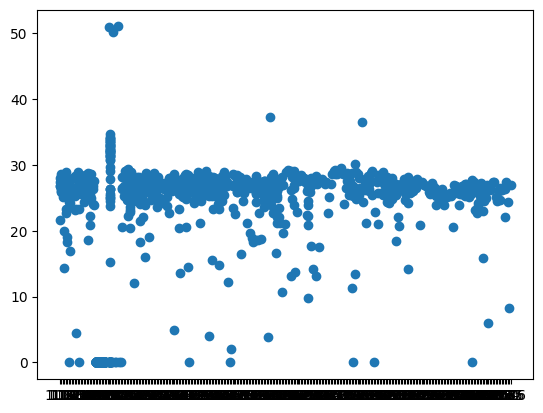

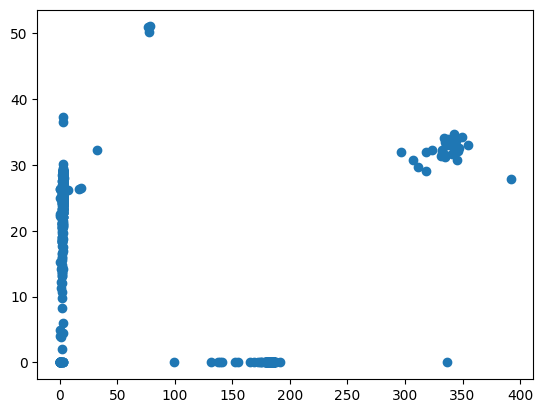

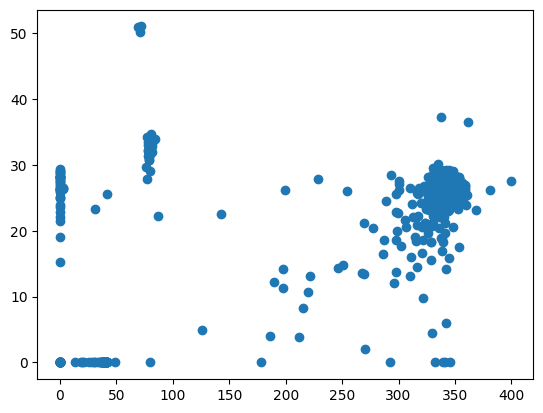

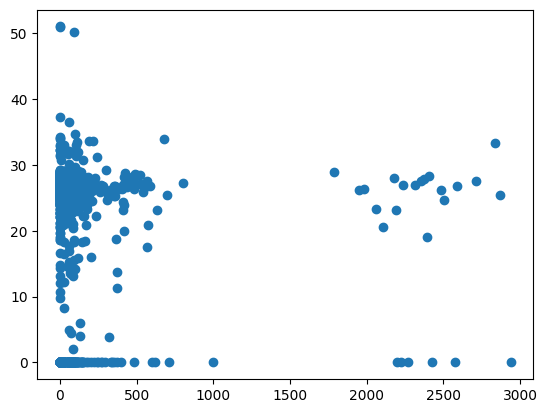

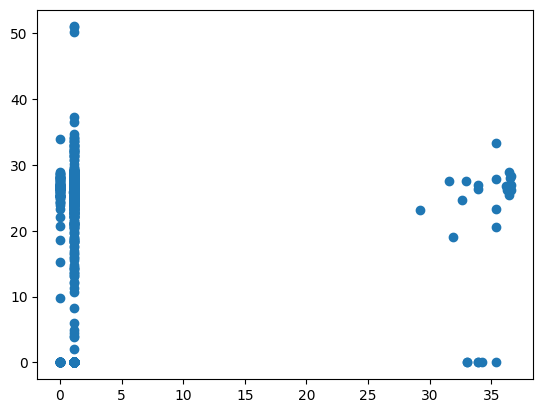

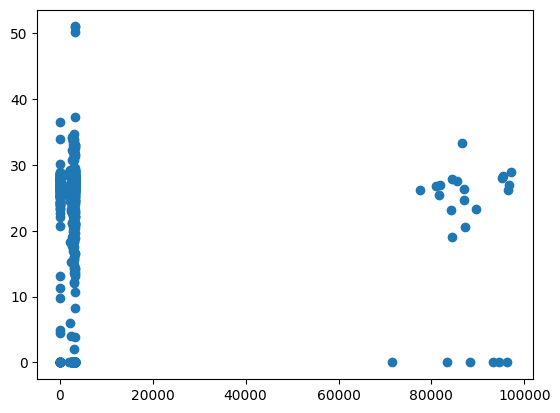

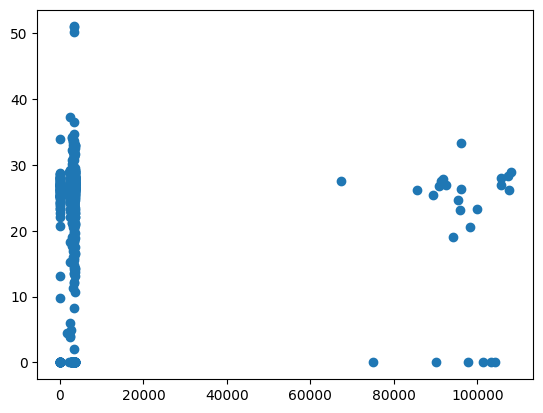

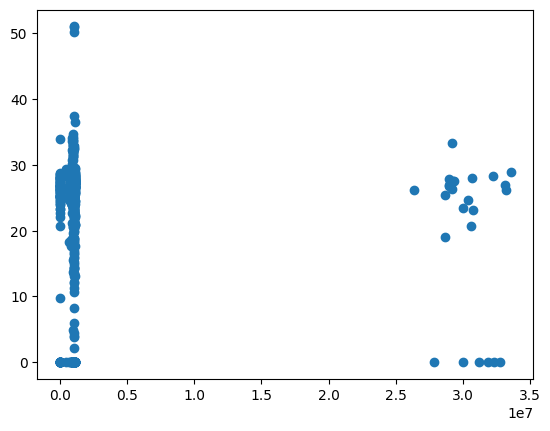

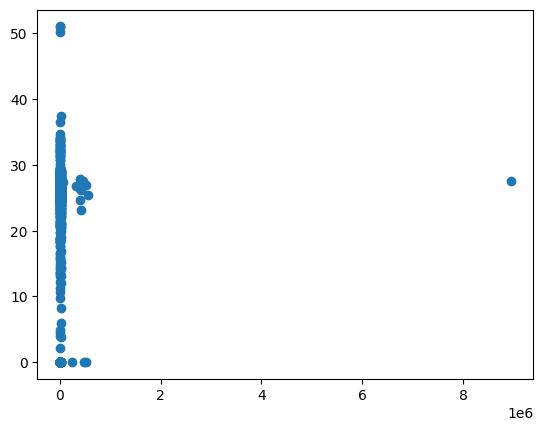

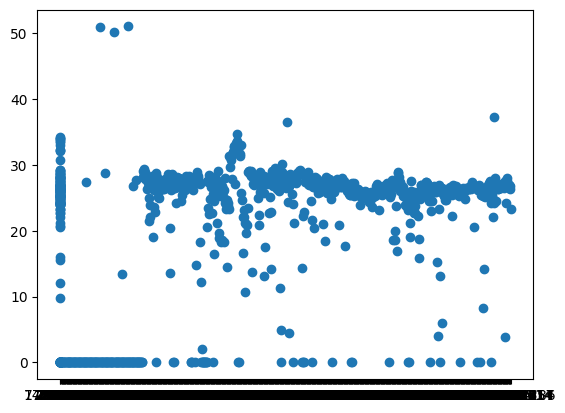

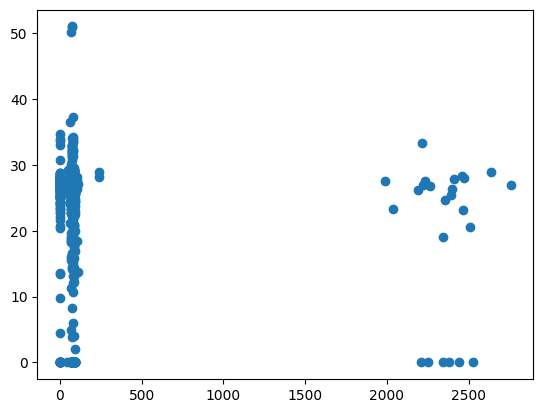

In [431]:
s = df.iloc[1:,[6,17,18,19,28,32,33,34,35,38,39,40]]
for i in s :
    plt.scatter(x = s[i] , y = df.iloc[1:,22])
    plt.show()